# 🏆 UIDAI Data Hackathon 2026 - Aadhaar Biometric Analysis

## Objective
Unlock meaningful patterns, trends, anomalies, and predictive indicators from Aadhaar Biometric data to support informed decision-making and system improvements.

## Analysis Scope
This notebook provides comprehensive exploratory data analysis (EDA) of:
- **1.8 Million+ biometric records** across multiple states and districts
- **Temporal patterns**: Daily, weekly, and monthly trends
- **Geographic distribution**: State, district, and PIN code level insights
- **Demographic analysis**: Age group biometric patterns
- **Performance metrics**: Efficiency, utilization, and inequality measures
- **Operational insights**: Weekend operations, campaigns, and infrastructure gaps

## Key Analysis Sections
1. **Data Loading & Quality Assessment**
2. **Feature Engineering & Data Preparation**
3. **Descriptive Statistics & Geographic Analysis**
4. **Time-Based Trend Analysis**
5. **Growth Rate & Momentum Analysis**
6. **Seasonal Pattern Decomposition**
7. **Correlation & Statistical Testing**
8. **State & District Performance Rankings**
9. **Efficiency & Capacity Metrics**
10. **Visualizations**
11. **Key Insights & Recommendations**

## 📚 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure matplotlib to handle Unicode properly
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 📂 Data Loading

In [2]:
files = [
    "../data/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv",
    "../data/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv",
    "../data/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv",
    "../data/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv",
]

df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

print(df.sample(3))
df.info()

               date        state        district  pincode  bio_age_5_17  bio_age_17_
348374   12-09-2025  Maharashtra           Thane   421004            32           43
1814408  27-12-2025      Haryana     Kurukshetra   136132            13           13
114385   01-09-2025        Bihar  East Champaran   845302            14           23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


## 🔧 State Name Standardization
Standardizing state names to official Indian state/UT names to ensure accurate analysis.

In [3]:
# Official Indian States and Union Territories (28 States + 8 UTs)
# This mapping fixes spelling variations, case differences, and naming inconsistencies

state_name_mapping = {
    # Andaman and Nicobar Islands variations
    'andaman & nicobar islands': 'Andaman and Nicobar Islands',
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman & nicobar': 'Andaman and Nicobar Islands',
    'a&n islands': 'Andaman and Nicobar Islands',
    
    # Andhra Pradesh variations
    'andhra pradesh': 'Andhra Pradesh',
    'ap': 'Andhra Pradesh',
    
    # Arunachal Pradesh
    'arunachal pradesh': 'Arunachal Pradesh',
    
    # Assam
    'assam': 'Assam',
    
    # Bihar
    'bihar': 'Bihar',
    
    # Chandigarh
    'chandigarh': 'Chandigarh',
    
    # Chhattisgarh
    'chhattisgarh': 'Chhattisgarh',
    'chattisgarh': 'Chhattisgarh',
    
    # Dadra and Nagar Haveli
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra & nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'd & n haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    
    # Daman and Diu
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman & diu': 'Dadra and Nagar Haveli and Daman and Diu',
    
    # Delhi
    'delhi': 'Delhi',
    'new delhi': 'Delhi',
    'nct of delhi': 'Delhi',
    
    # Goa
    'goa': 'Goa',
    
    # Gujarat
    'gujarat': 'Gujarat',
    
    # Haryana
    'haryana': 'Haryana',
    
    # Himachal Pradesh
    'himachal pradesh': 'Himachal Pradesh',
    'hp': 'Himachal Pradesh',
    
    # Jammu and Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu & kashmir': 'Jammu and Kashmir',
    'j&k': 'Jammu and Kashmir',
    'j & k': 'Jammu and Kashmir',
    
    # Jharkhand
    'jharkhand': 'Jharkhand',
    
    # Karnataka
    'karnataka': 'Karnataka',
    
    # Kerala
    'kerala': 'Kerala',
    
    # Ladakh
    'ladakh': 'Ladakh',
    
    # Lakshadweep
    'lakshadweep': 'Lakshadweep',
    'laccadive': 'Lakshadweep',
    
    # Madhya Pradesh
    'madhya pradesh': 'Madhya Pradesh',
    'mp': 'Madhya Pradesh',
    
    # Maharashtra
    'maharashtra': 'Maharashtra',
    'maharastra': 'Maharashtra',
    
    # Manipur
    'manipur': 'Manipur',
    
    # Meghalaya
    'meghalaya': 'Meghalaya',
    
    # Mizoram
    'mizoram': 'Mizoram',
    
    # Nagaland
    'nagaland': 'Nagaland',
    
    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    
    # Puducherry
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',
    
    # Punjab
    'punjab': 'Punjab',
    
    # Rajasthan
    'rajasthan': 'Rajasthan',
    
    # Sikkim
    'sikkim': 'Sikkim',
    
    # Tamil Nadu
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'tn': 'Tamil Nadu',
    
    # Telangana
    'telangana': 'Telangana',
    'telengana': 'Telangana',
    
    # Tripura
    'tripura': 'Tripura',
    
    # Uttar Pradesh
    'uttar pradesh': 'Uttar Pradesh',
    'up': 'Uttar Pradesh',
    
    # Uttarakhand
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',
    
    # West Bengal
    'west bengal': 'West Bengal',
    'wb': 'West Bengal',
}

def standardize_state_name(state):
    """
    Standardize state names to official Indian state/UT names
    Handles case sensitivity, abbreviations, and spelling variations
    """
    if pd.isna(state):
        return state
    
    # Convert to string and strip whitespace
    state_str = str(state).strip()
    
    # Remove extra spaces
    state_str = ' '.join(state_str.split())
    
    # Convert to lowercase for matching
    state_lower = state_str.lower()
    
    # Check if it's in our mapping
    if state_lower in state_name_mapping:
        return state_name_mapping[state_lower]
    
    # If not found, return in title case
    return state_str.title()

# Apply state name standardization
print("="*80)
print("STATE NAME STANDARDIZATION")
print("="*80)
print(f"Before standardization:")
print(f"  • Unique states: {df['state'].nunique()}")
print(f"  • Sample state names: {sorted(df['state'].unique())[:10]}")

df['state'] = df['state'].apply(standardize_state_name)

print(f"\n{'='*80}")
print(f"After standardization:")
print(f"  • Unique states: {df['state'].nunique()}")
print(f"  • Standardized state names: {sorted(df['state'].unique())}")
print(f"\n✅ State standardization complete!")
print("="*80)

STATE NAME STANDARDIZATION
Before standardization:
  • Unique states: 57
  • Sample state names: ['Andaman & Nicobar Islands', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhatisgarh', 'Chhattisgarh', 'Dadra & Nagar Haveli']

After standardization:
  • Unique states: 39
  • Standardized state names: ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhatisgarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bangal', 'West Bengal', 'Westbengal']

✅ State standardization complete!


## 🏘️ District Name Standardization
Standardizing district names to match official Indian districts and fix:
- Case sensitivity issues (e.g., "NADIA" vs "Nadia")
- "and" vs "&" variations (e.g., "Dadra And Nagar Haveli" vs "Dadra and Nagar Haveli")
- Spelling variations and naming inconsistencies

In [4]:
# Comprehensive district name mapping to handle variations
district_name_mapping = {
    # Dadra and Nagar Haveli variations
    'dadra & nagar haveli': 'Dadra and Nagar Haveli',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli',
    
    # Lahul and Spiti variations
    'lahul & spiti': 'Lahaul and Spiti',
    'lahul and spiti': 'Lahaul and Spiti',
    'lahaul & spiti': 'Lahaul and Spiti',
    
    # Andaman districts
    'andamans': 'South Andaman',
    'north & middle andaman': 'North and Middle Andaman',
    'north and middle andaman': 'North and Middle Andaman',
    'south andaman': 'South Andaman',
    
    # 24 Parganas
    '24 paraganas north': 'North 24 Parganas',
    '24 paraganas south': 'South 24 Parganas',
    'north twenty four parganas': 'North 24 Parganas',
    'south twenty four parganas': 'South 24 Parganas',
    'south 24 parganas': 'South 24 Parganas',
    'north 24 parganas': 'North 24 Parganas',
    
    # Spelling variations
    'bulandshahar': 'Bulandshahr',
    'anugal': 'Angul',
    'anugul': 'Angul',
    'ahilyanagar': 'Ahmednagar',
    'ahmed nagar': 'Ahmednagar',
    'ahmadnagar': 'Ahmednagar',
    'ahmadabad': 'Ahmedabad',
    'ananthapur': 'Anantapur',
    'ananthapuramu': 'Anantapur',
    'allahabad': 'Prayagraj',
    
    # Aurangabad variations (state-specific)
    'aurangabad(bh)': 'Aurangabad (Bihar)',
    'aurangabad(mh)': 'Aurangabad (Maharashtra)',
    
    # Bandipore/Bandipur
    'bandipore': 'Bandipora',
    'bandipur': 'Bandipora',
    
    # Remove asterisks or special characters
    'nandurbar *': 'Nandurbar',
    
    # Punch variations
    'punch': 'Poonch',
    
    # Other common variations
    'seraikela-kharsawan': 'Seraikela Kharsawan',
}

def standardize_district_name(district, state=None):
    """
    Standardize district names to official Indian district names
    Handles case sensitivity, 'and' vs '&', and spelling variations
    """
    if pd.isna(district):
        return district
    
    # Convert to string and strip whitespace
    district_str = str(district).strip()
    
    # Remove extra spaces
    district_str = ' '.join(district_str.split())
    
    # Convert to lowercase for matching
    district_lower = district_str.lower()
    
    # Check if it's in our mapping
    if district_lower in district_name_mapping:
        return district_name_mapping[district_lower]
    
    # Standardize 'and' vs '&': Always use 'and'
    if '&' in district_str:
        district_str = district_str.replace(' & ', ' and ')
        district_str = district_str.replace('&', ' and ')
        # Clean up any double spaces
        district_str = ' '.join(district_str.split())
    
    # Remove common suffixes/prefixes that might be inconsistent
    district_str = district_str.strip('*').strip()
    
    # Return in title case for consistency
    return district_str.title()

# Apply district name standardization
print("="*80)
print("DISTRICT NAME STANDARDIZATION")
print("="*80)
print(f"Before standardization:")
print(f"  • Unique districts: {df['district'].nunique()}")

# Show some examples of variations before cleaning
print(f"\n  • Sample district names (first 20):")
sample_districts = sorted(df['district'].unique())[:20]
for dist in sample_districts:
    print(f"    - {dist}")

# Apply standardization
df['district_clean'] = df.apply(
    lambda row: standardize_district_name(row['district'], row['state']), 
    axis=1
)

# Replace the original district column
df['district'] = df['district_clean']
df.drop(columns=['district_clean'], inplace=True)

print(f"\n{'='*80}")
print(f"After standardization:")
print(f"  • Unique districts: {df['district'].nunique()}")

# Check for any remaining invalid entries (like numeric values)
invalid_districts = df[df['district'].str.match(r'^\d+$', na=False)]['district'].unique()
if len(invalid_districts) > 0:
    print(f"\n⚠️ Warning: Found {len(invalid_districts)} invalid district entries (numeric):")
    print(invalid_districts)
    # Remove rows with invalid district names
    df = df[~df['district'].str.match(r'^\d+$', na=False)]
    print(f"\n✓ Removed invalid entries. New record count: {len(df):,}")

print(f"\n✅ District standardization complete!")
print("="*80)

DISTRICT NAME STANDARDIZATION
Before standardization:
  • Unique districts: 974

  • Sample district names (first 20):
    - ?
    - ANGUL
    - ANUGUL
    - Adilabad
    - Agar Malwa
    - Agra
    - Ahilyanagar
    - Ahmadabad
    - Ahmadnagar
    - Ahmed Nagar
    - Ahmedabad
    - Aizawl
    - Ajmer
    - Akhera
    - Akola
    - Alappuzha
    - Aligarh
    - Alipurduar
    - Alirajpur
    - Allahabad

After standardization:
  • Unique districts: 914

✅ District standardization complete!


In [5]:
# Detailed district analysis by state
print("="*80)
print("DISTRICT DISTRIBUTION BY STATE")
print("="*80)

# Group by state and count districts
state_district_counts = df.groupby('state')['district'].nunique().sort_values(ascending=False)

print(f"\nTop 15 states by number of districts:")
print(state_district_counts.head(15).to_string())

print(f"\n{'='*80}")
print(f"Overall Statistics:")
print(f"  • Total States/UTs: {df['state'].nunique()}")
print(f"  • Total Districts: {df['district'].nunique()}")
print(f"  • Average districts per state: {state_district_counts.mean():.1f}")
print(f"  • Median districts per state: {state_district_counts.median():.0f}")
print("="*80)

# Show sample of cleaned district names by state
print(f"\nSample of cleaned districts (first 5 states):")
for state in sorted(df['state'].unique())[:5]:
    districts_in_state = sorted(df[df['state'] == state]['district'].unique())
    print(f"\n{state} ({len(districts_in_state)} districts):")
    for dist in districts_in_state[:10]:  # Show first 10 districts
        print(f"  • {dist}")
    if len(districts_in_state) > 10:
        print(f"  ... and {len(districts_in_state) - 10} more")
        
print("\n" + "="*80)

DISTRICT DISTRIBUTION BY STATE

Top 15 states by number of districts:
state
Uttar Pradesh     83
Madhya Pradesh    59
Karnataka         48
Maharashtra       46
Bihar             46
Tamil Nadu        45
West Bengal       45
Rajasthan         45
Andhra Pradesh    43
Telangana         40
Chhattisgarh      40
Odisha            38
Gujarat           38
Assam             37
Jharkhand         31

Overall Statistics:
  • Total States/UTs: 39
  • Total Districts: 914
  • Average districts per state: 24.2
  • Median districts per state: 17

Sample of cleaned districts (first 5 states):

Andaman and Nicobar Islands (4 districts):
  • Nicobar
  • Nicobars
  • North and Middle Andaman
  • South Andaman

Andhra Pradesh (43 districts):
  • Adilabad
  • Alluri Sitharama Raju
  • Anakapalli
  • Anantapur
  • Annamayya
  • Bapatla
  • Chittoor
  • Cuddapah
  • Dr. B. R. Ambedkar Konaseema
  • East Godavari
  ... and 33 more

Arunachal Pradesh (25 districts):
  • Anjaw
  • Changlang
  • Dibang Valley
  • 

In [6]:
# Check for any remaining case-sensitivity or duplicate issues
print("="*80)
print("DISTRICT QUALITY CHECK - DETECTING REMAINING ISSUES")
print("="*80)

# Check for case-sensitivity duplicates
from collections import defaultdict

case_groups = defaultdict(list)
for district in df['district'].unique():
    if pd.notna(district):
        case_groups[str(district).lower()].append(district)

# Find groups with multiple case variations
case_duplicates = {k: v for k, v in case_groups.items() if len(v) > 1}

if case_duplicates:
    print(f"\n⚠️ Found {len(case_duplicates)} district names with case variations:")
    for lowercase_name, variations in sorted(case_duplicates.items())[:10]:  # Show first 10
        print(f"  • {variations}")
    if len(case_duplicates) > 10:
        print(f"  ... and {len(case_duplicates) - 10} more")
else:
    print("\n✓ No case-sensitivity duplicates found")

# Check for '&' vs 'and' issues
districts_with_ampersand = df[df['district'].str.contains('&', na=False)]['district'].unique()
if len(districts_with_ampersand) > 0:
    print(f"\n⚠️ Found {len(districts_with_ampersand)} districts with '&' character:")
    for dist in sorted(districts_with_ampersand)[:10]:
        print(f"  • {dist}")
else:
    print("\n✓ No '&' characters found in district names")

print("\n" + "="*80)
print("✅ Quality check complete!")
print("="*80)

DISTRICT QUALITY CHECK - DETECTING REMAINING ISSUES

⚠️ Found 1 district names with case variations:
  • ['Lahaul and Spiti', 'Lahaul And Spiti']

✓ No '&' characters found in district names

✅ Quality check complete!


## 📊 Data Preparation & Feature Engineering

In [7]:
# Convert date column to datetime with correct format (DD-MM-YYYY)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['week_of_year'] = df['date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Display basic info
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nShape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nDate Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Days: {(df['date'].max() - df['date'].min()).days}")
print("="*80)

DATASET OVERVIEW

Shape: (1861108, 13)

Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_', 'year', 'month', 'day', 'day_of_week', 'day_name', 'week_of_year', 'is_weekend']

Date Range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00
Total Days: 303


In [8]:
# Data quality assessment
print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\n" + "="*80)

DATA QUALITY ASSESSMENT

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []



In [9]:
# Descriptive statistics
print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print(df.describe())
print("\n" + "="*80)
print("AGE GROUP STATISTICS")
print("="*80)
print(f"Total Biometrics (Age 5-17): {df['bio_age_5_17'].sum():,}")
print(f"Total Biometrics (Age 17+): {df['bio_age_17_'].sum():,}")
# Calculate total biometrics first
df['total_biometrics'] = df['bio_age_5_17'] + df['bio_age_17_']
print(f"Total Biometrics (Overall): {df['total_biometrics'].sum():,}")
print(f"\nAverage per record (Age 5-17): {df['bio_age_5_17'].mean():.2f}")
print(f"Average per record (Age 17+): {df['bio_age_17_'].mean():.2f}")
print(f"Average per record (Overall): {df['total_biometrics'].mean():.2f}")
print("="*80)

DESCRIPTIVE STATISTICS
                                date       pincode  bio_age_5_17   bio_age_17_       year         month           day   day_of_week  week_of_year    is_weekend
count                        1861108  1.861108e+06  1.861108e+06  1.861108e+06  1861108.0  1.861108e+06  1.861108e+06  1.861108e+06     1861108.0  1.861108e+06
mean   2025-10-22 22:32:04.288543232  5.217612e+05  1.839058e+01  1.909413e+01     2025.0  1.031275e+01  1.318251e+01  2.902218e+00     42.365132  2.683009e-01
min              2025-03-01 00:00:00  1.100010e+05  0.000000e+00  0.000000e+00     2025.0  3.000000e+00  1.000000e+00  0.000000e+00           1.0  0.000000e+00
25%              2025-09-18 00:00:00  3.911750e+05  1.000000e+00  1.000000e+00     2025.0  9.000000e+00  6.000000e+00  1.000000e+00          38.0  0.000000e+00
50%              2025-11-04 00:00:00  5.224010e+05  3.000000e+00  4.000000e+00     2025.0  1.100000e+01  1.300000e+01  3.000000e+00          45.0  0.000000e+00
75%              

## 🗺️ Geographic Analysis

In [10]:
# State-wise analysis
# Calculate total biometrics per state
df['total_biometrics'] = df['bio_age_5_17'] + df['bio_age_17_']

state_stats = df.groupby('state').agg({
    'total_biometrics': 'sum',
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum',
    'district': 'nunique',
    'pincode': 'nunique',
    'date': 'count'
}).rename(columns={
    'date': 'total_records',
    'district': 'num_districts',
    'pincode': 'num_pincodes'
}).sort_values('total_biometrics', ascending=False)

print("="*80)
print("STATE-WISE STATISTICS")
print("="*80)
print(state_stats.head(15))
print("="*80)

STATE-WISE STATISTICS
                total_biometrics  bio_age_5_17  bio_age_17_  num_districts  num_pincodes  total_records
state                                                                                                  
Uttar Pradesh            9577735       6207105      3370630             83          1753         155242
Maharashtra              9226139       3512712      5713427             46          1607         151104
Madhya Pradesh           5923771       3200117      2723654             59           797          70080
Bihar                    4897587       2208141      2689446             46           917          83398
Tamil Nadu               4698118       2227253      2470865             45          2088         184569
Rajasthan                3994955       2066747      1928208             45           986          79724
Andhra Pradesh           3714633       2241467      1473166             43          1847         172065
Gujarat                  3196514       146

In [11]:
# District-wise analysis
district_stats = df.groupby(['state', 'district']).agg({
    'total_biometrics': 'sum',
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum',
    'pincode': 'nunique',
    'date': 'count'
}).rename(columns={
    'date': 'total_records',
    'pincode': 'num_pincodes'
}).sort_values('total_biometrics', ascending=False)

print("="*80)
print("TOP 20 DISTRICTS BY TOTAL BIOMETRIC COLLECTIONS")
print("="*80)
print(district_stats.head(20))
print("="*80)

TOP 20 DISTRICTS BY TOTAL BIOMETRIC COLLECTIONS
                                 total_biometrics  bio_age_5_17  bio_age_17_  num_pincodes  total_records
state          district                                                                                  
Maharashtra    Pune                        605762        283480       322282           147          11586
               Nashik                      576606        213100       363506            77           6102
               Thane                       571273        202896       368377            96           7250
Gujarat        Ahmedabad                   421172        166849       254323            89           8730
Maharashtra    Jalgaon                     417384        148853       268531            66           5000
               Mumbai                      404359        119615       284744           135           7603
               Ahmednagar                  369417        165848       203569            94           892

## 📅 Temporal Analysis

In [12]:
# Daily time series of total biometrics
daily_ts = df.groupby('date')['total_biometrics'].sum().reset_index(name='total_biometrics')

print("="*80)
print("DAILY TIME SERIES STATISTICS - TOTAL BIOMETRICS")
print("="*80)
print(daily_ts.describe())
print("="*80)

DAILY TIME SERIES STATISTICS - TOTAL BIOMETRICS
                                date  total_biometrics
count                             89      8.900000e+01
mean   2025-10-23 00:32:21.573033728      7.838550e+05
min              2025-03-01 00:00:00      3.900000e+01
25%              2025-09-18 00:00:00      2.757130e+05
50%              2025-11-02 00:00:00      3.669970e+05
75%              2025-12-04 00:00:00      4.303700e+05
max              2025-12-29 00:00:00      9.792552e+06
std                              NaN      1.907369e+06


In [13]:
# Weekly patterns
weekly_pattern = df.groupby('day_name').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

print("="*80)
print("WEEKLY PATTERN")
print("="*80)
print(weekly_pattern)
print("="*80)

WEEKLY PATTERN
day_name
Monday       265809
Tuesday      313583
Wednesday    232185
Thursday     276973
Friday       273221
Saturday     296437
Sunday       202900
dtype: int64


In [14]:
# Monthly patterns
monthly_pattern = df.groupby(['year', 'month']).size().reset_index(name='count')

print("="*80)
print("MONTHLY PATTERN")
print("="*80)
print(monthly_pattern)
print("="*80)

MONTHLY PATTERN
   year  month   count
0  2025      3   21953
1  2025      4   21603
2  2025      5   21987
3  2025      6   21991
4  2025      7   22169
5  2025      9  416846
6  2025     10  331715
7  2025     11  459086
8  2025     12  543758


In [15]:
# Top performing locations by total biometrics
print("="*80)
print("TOP PERFORMING LOCATIONS")
print("="*80)

print("\nTop 10 Districts by Total Biometrics:")
top_districts = df.groupby(['state', 'district'])['total_biometrics'].sum().sort_values(ascending=False).head(10)
for idx, ((state, district), total) in enumerate(top_districts.items(), 1):
    print(f"{idx:2d}. {district}, {state}: {total:,}")

print("\nTop 10 PIN Codes by Total Biometrics:")
top_pincodes = df.groupby(['pincode', 'state', 'district'])['total_biometrics'].sum().sort_values(ascending=False).head(10)
for idx, ((pincode, state, district), total) in enumerate(top_pincodes.items(), 1):
    print(f"{idx:2d}. {pincode} ({district}, {state}): {total:,}")

print("="*80)

TOP PERFORMING LOCATIONS

Top 10 Districts by Total Biometrics:
 1. Pune, Maharashtra: 605,762
 2. Nashik, Maharashtra: 576,606
 3. Thane, Maharashtra: 571,273
 4. Ahmedabad, Gujarat: 421,172
 5. Jalgaon, Maharashtra: 417,384
 6. Mumbai, Maharashtra: 404,359
 7. Ahmednagar, Maharashtra: 369,417
 8. Jaipur, Rajasthan: 355,884
 9. Nagpur, Maharashtra: 350,923
10. Kurnool, Andhra Pradesh: 350,633

Top 10 PIN Codes by Total Biometrics:
 1. 431001 (Aurangabad, Maharashtra): 78,727
 2. 244001 (Moradabad, Uttar Pradesh): 77,122
 3. 110086 (North West Delhi, Delhi): 66,190
 4. 247001 (Saharanpur, Uttar Pradesh): 61,417
 5. 202001 (Aligarh, Uttar Pradesh): 58,922
 6. 423203 (Nashik, Maharashtra): 58,470
 7. 110094 (North East Delhi, Delhi): 58,334
 8. 110059 (West Delhi, Delhi): 57,064
 9. 110062 (South Delhi, Delhi): 50,367
10. 283203 (Firozabad, Uttar Pradesh): 50,322


In [16]:
# Daily age group trends
daily_age_ts = df.groupby('date').agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum',
    'total_biometrics': 'sum'
}).reset_index()

print("="*80)
print("DAILY AGE GROUP TRENDS")
print("="*80)
print(daily_age_ts.describe())
print("="*80)

DAILY AGE GROUP TRENDS
                                date  bio_age_5_17   bio_age_17_  total_biometrics
count                             89  8.900000e+01  8.900000e+01      8.900000e+01
mean   2025-10-23 00:32:21.573033728  3.845714e+05  3.992836e+05      7.838550e+05
min              2025-03-01 00:00:00  3.700000e+01  2.000000e+00      3.900000e+01
25%              2025-09-18 00:00:00  1.379190e+05  1.390580e+05      2.757130e+05
50%              2025-11-02 00:00:00  1.868380e+05  1.824650e+05      3.669970e+05
75%              2025-12-04 00:00:00  2.269420e+05  2.090780e+05      4.303700e+05
max              2025-12-29 00:00:00  4.499057e+06  5.293495e+06      9.792552e+06
std                              NaN  9.019468e+05  1.007525e+06      1.907369e+06


In [17]:
# Age group distribution analysis
print("="*80)
print("AGE GROUP DISTRIBUTION ANALYSIS")
print("="*80)

# Overall age group percentages
total_5_17 = df['bio_age_5_17'].sum()
total_17_plus = df['bio_age_17_'].sum()
total_all = total_5_17 + total_17_plus

print(f"\nOverall Distribution:")
print(f"  • Age 5-17:  {total_5_17:,} ({(total_5_17/total_all*100):.2f}%)")
print(f"  • Age 17+:   {total_17_plus:,} ({(total_17_plus/total_all*100):.2f}%)")
print(f"  • Total:     {total_all:,}")

# State-wise age group analysis
print(f"\n{'='*80}")
print("TOP 10 STATES BY AGE GROUP")
print("="*80)

state_age_analysis = df.groupby('state').agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum',
    'total_biometrics': 'sum'
}).sort_values('total_biometrics', ascending=False)

state_age_analysis['pct_age_5_17'] = (state_age_analysis['bio_age_5_17'] / state_age_analysis['total_biometrics'] * 100).round(2)
state_age_analysis['pct_age_17_plus'] = (state_age_analysis['bio_age_17_'] / state_age_analysis['total_biometrics'] * 100).round(2)

print(state_age_analysis.head(10))
print("="*80)

AGE GROUP DISTRIBUTION ANALYSIS

Overall Distribution:
  • Age 5-17:  34,226,855 (49.06%)
  • Age 17+:   35,536,240 (50.94%)
  • Total:     69,763,095

TOP 10 STATES BY AGE GROUP
                bio_age_5_17  bio_age_17_  total_biometrics  pct_age_5_17  pct_age_17_plus
state                                                                                     
Uttar Pradesh        6207105      3370630           9577735         64.81            35.19
Maharashtra          3512712      5713427           9226139         38.07            61.93
Madhya Pradesh       3200117      2723654           5923771         54.02            45.98
Bihar                2208141      2689446           4897587         45.09            54.91
Tamil Nadu           2227253      2470865           4698118         47.41            52.59
Rajasthan            2066747      1928208           3994955         51.73            48.27
Andhra Pradesh       2241467      1473166           3714633         60.34            39.66
Gu

## 👥 Age Group Analysis

## 📈 Visualizations

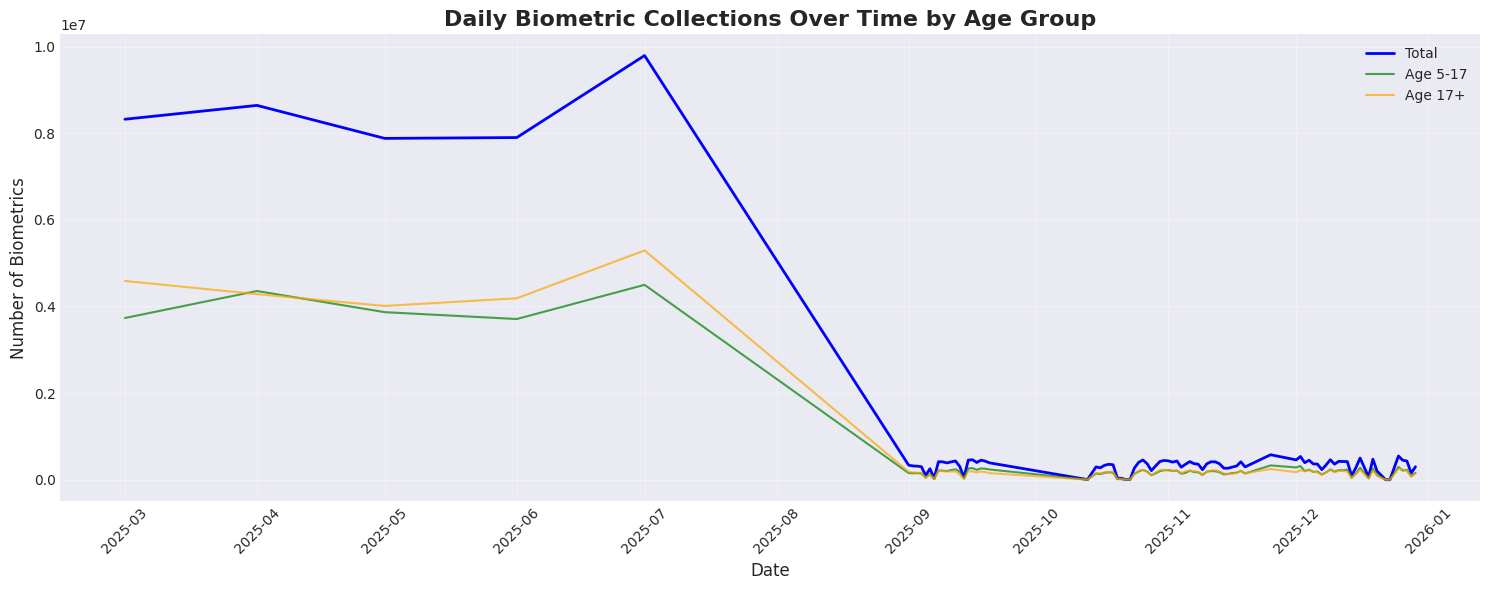

In [18]:
# Daily time series plot - Total Biometrics
plt.figure(figsize=(15, 6))
plt.plot(daily_age_ts['date'], daily_age_ts['total_biometrics'], linewidth=2, label='Total', color='blue')
plt.plot(daily_age_ts['date'], daily_age_ts['bio_age_5_17'], linewidth=1.5, label='Age 5-17', alpha=0.7, color='green')
plt.plot(daily_age_ts['date'], daily_age_ts['bio_age_17_'], linewidth=1.5, label='Age 17+', alpha=0.7, color='orange')
plt.title('Daily Biometric Collections Over Time by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Biometrics', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

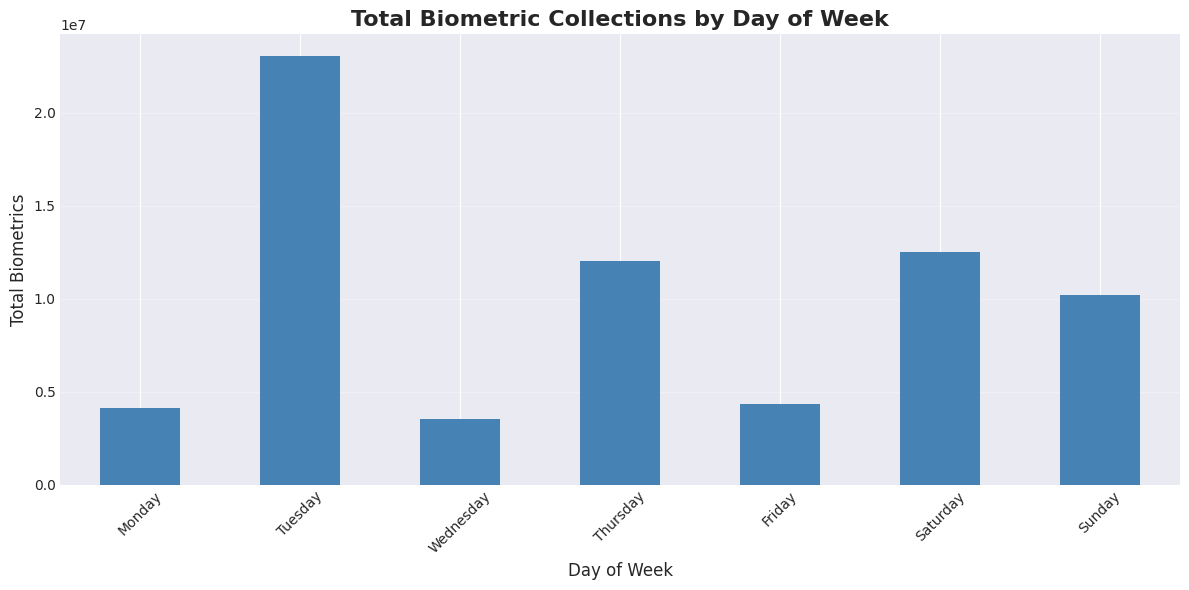

In [19]:
# Weekly pattern visualization
weekly_pattern_bio = df.groupby('day_name')['total_biometrics'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(12, 6))
weekly_pattern_bio.plot(kind='bar', color='steelblue')
plt.title('Total Biometric Collections by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Biometrics', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

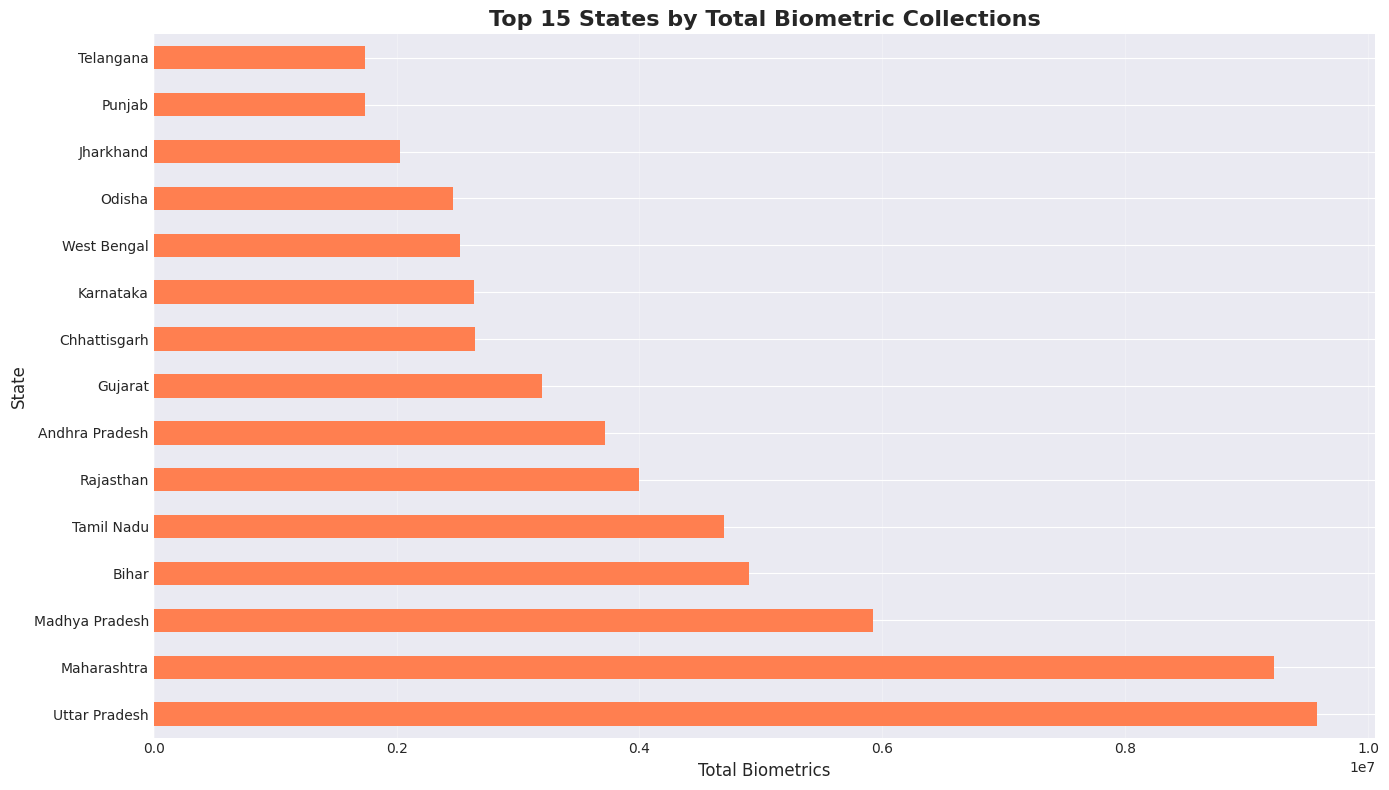

In [20]:
# Top states visualization
plt.figure(figsize=(14, 8))
state_stats.head(15)['total_biometrics'].plot(kind='barh', color='coral')
plt.title('Top 15 States by Total Biometric Collections', fontsize=16, fontweight='bold')
plt.xlabel('Total Biometrics', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

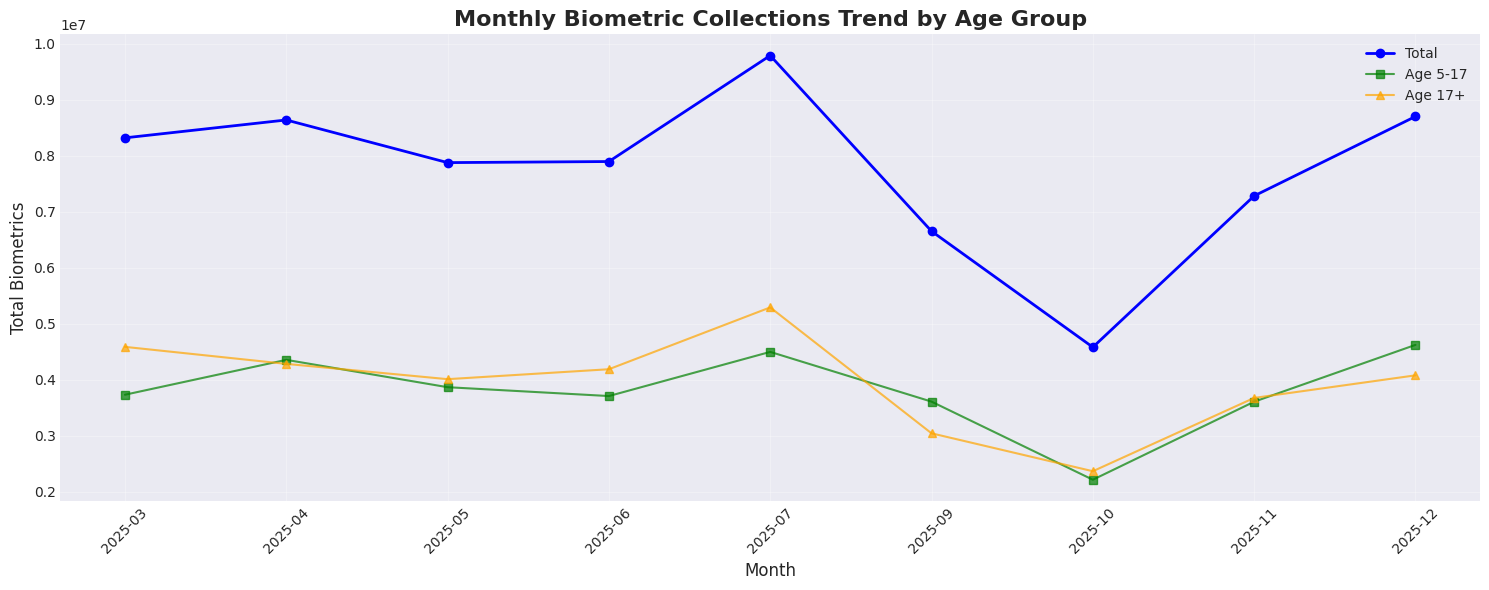

In [21]:
# Monthly trend visualization
monthly_bio_pattern = df.groupby(['year', 'month']).agg({
    'total_biometrics': 'sum',
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum'
}).reset_index()

if len(monthly_bio_pattern) > 0:
    plt.figure(figsize=(15, 6))
    monthly_bio_pattern['year_month'] = monthly_bio_pattern['year'].astype(str) + '-' + monthly_bio_pattern['month'].astype(str).str.zfill(2)
    
    x_positions = range(len(monthly_bio_pattern))
    plt.plot(x_positions, monthly_bio_pattern['total_biometrics'], marker='o', linewidth=2, label='Total', color='blue')
    plt.plot(x_positions, monthly_bio_pattern['bio_age_5_17'], marker='s', linewidth=1.5, label='Age 5-17', alpha=0.7, color='green')
    plt.plot(x_positions, monthly_bio_pattern['bio_age_17_'], marker='^', linewidth=1.5, label='Age 17+', alpha=0.7, color='orange')
    
    plt.title('Monthly Biometric Collections Trend by Age Group', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Biometrics', fontsize=12)
    plt.xticks(x_positions, monthly_bio_pattern['year_month'], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

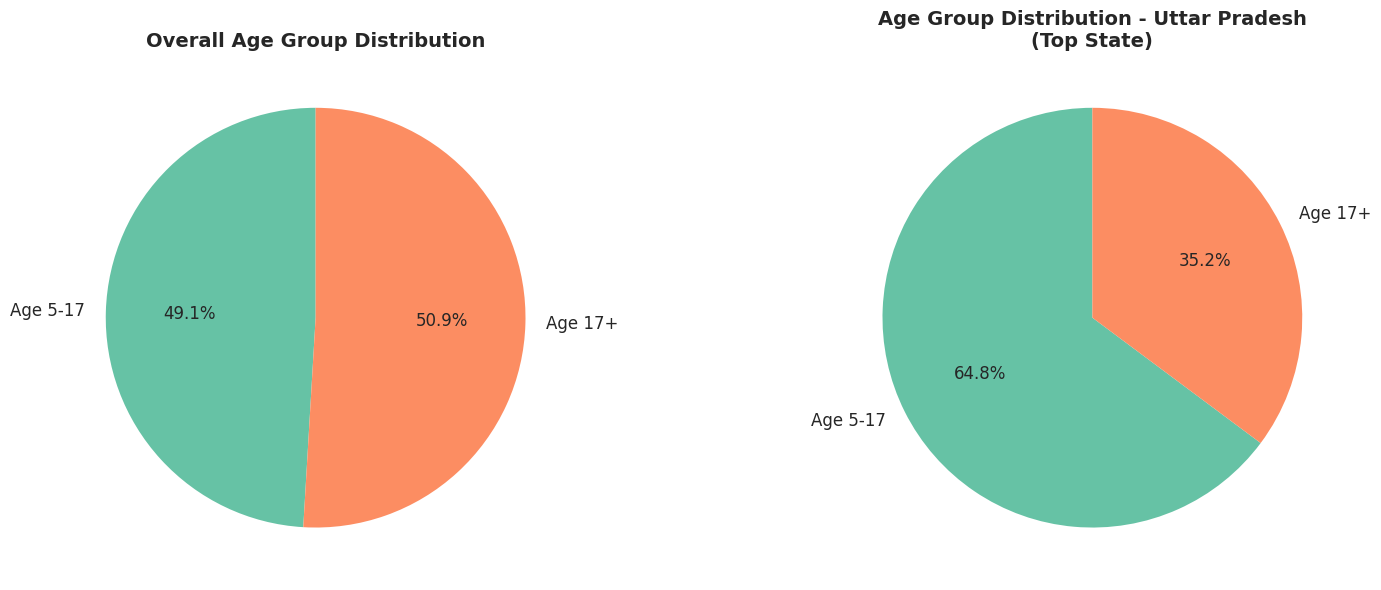

In [22]:
# Age group comparison - Pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Overall age distribution
age_totals = [df['bio_age_5_17'].sum(), df['bio_age_17_'].sum()]
age_labels = ['Age 5-17', 'Age 17+']
colors = ['#66c2a5', '#fc8d62']

ax1.pie(age_totals, labels=age_labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
ax1.set_title('Overall Age Group Distribution', fontsize=14, fontweight='bold')

# Top state age distribution
top_state = state_stats.index[0]
top_state_data = df[df['state'] == top_state]
state_age_totals = [top_state_data['bio_age_5_17'].sum(), top_state_data['bio_age_17_'].sum()]

ax2.pie(state_age_totals, labels=age_labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
ax2.set_title(f'Age Group Distribution - {top_state}\n(Top State)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

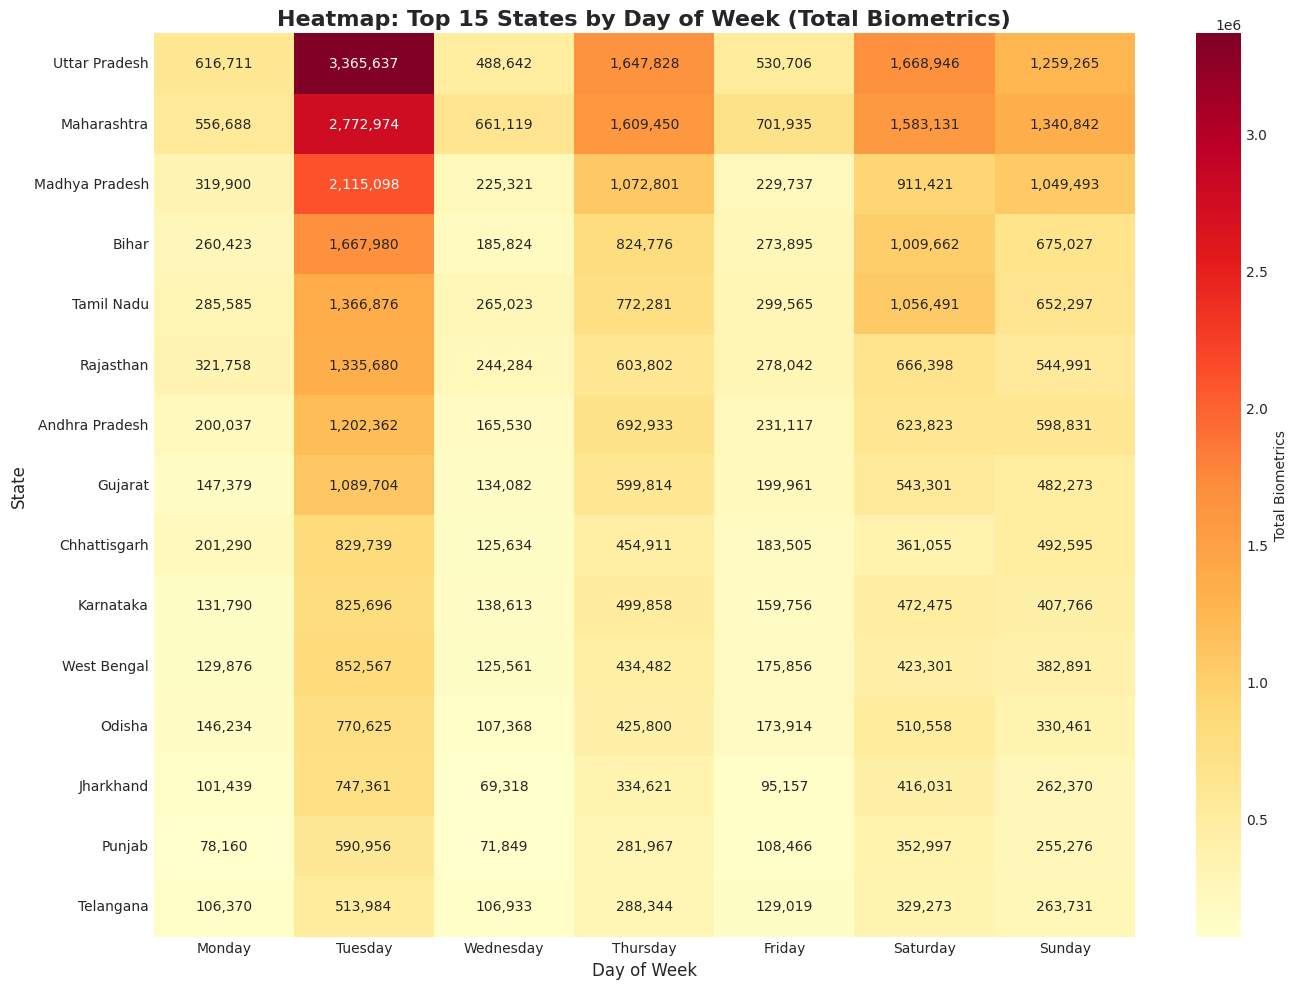

In [23]:
# Heatmap of biometric collections by state and day of week
state_dow_bio = df.groupby(['state', 'day_name'])['total_biometrics'].sum().unstack(fill_value=0)
state_dow_bio = state_dow_bio[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Sort by total and get top 15
state_dow_bio['total'] = state_dow_bio.sum(axis=1)
state_dow_bio = state_dow_bio.sort_values('total', ascending=False).drop('total', axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(state_dow_bio.head(15), annot=True, fmt=',.0f', cmap='YlOrRd', cbar_kws={'label': 'Total Biometrics'})
plt.title('Heatmap: Top 15 States by Day of Week (Total Biometrics)', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

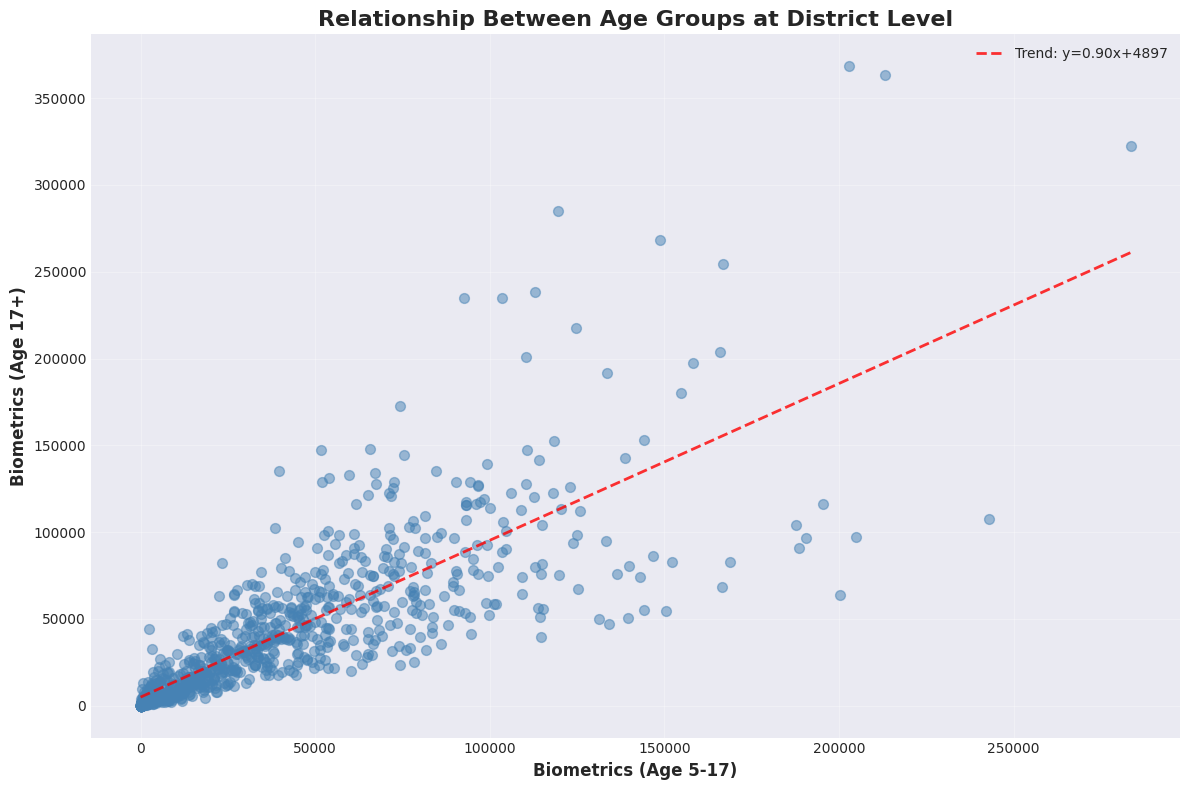

In [24]:
# Scatter plot - Age group relationship
plt.figure(figsize=(12, 8))
sample_data = df.groupby(['state', 'district']).agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum'
}).reset_index()

plt.scatter(sample_data['bio_age_5_17'], sample_data['bio_age_17_'], alpha=0.5, s=50, color='steelblue')
plt.xlabel('Biometrics (Age 5-17)', fontsize=12, fontweight='bold')
plt.ylabel('Biometrics (Age 17+)', fontsize=12, fontweight='bold')
plt.title('Relationship Between Age Groups at District Level', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(sample_data['bio_age_5_17'], sample_data['bio_age_17_'], 1)
p = np.poly1d(z)
plt.plot(sample_data['bio_age_5_17'].sort_values(), p(sample_data['bio_age_5_17'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.0f}')
plt.legend()

plt.tight_layout()
plt.show()

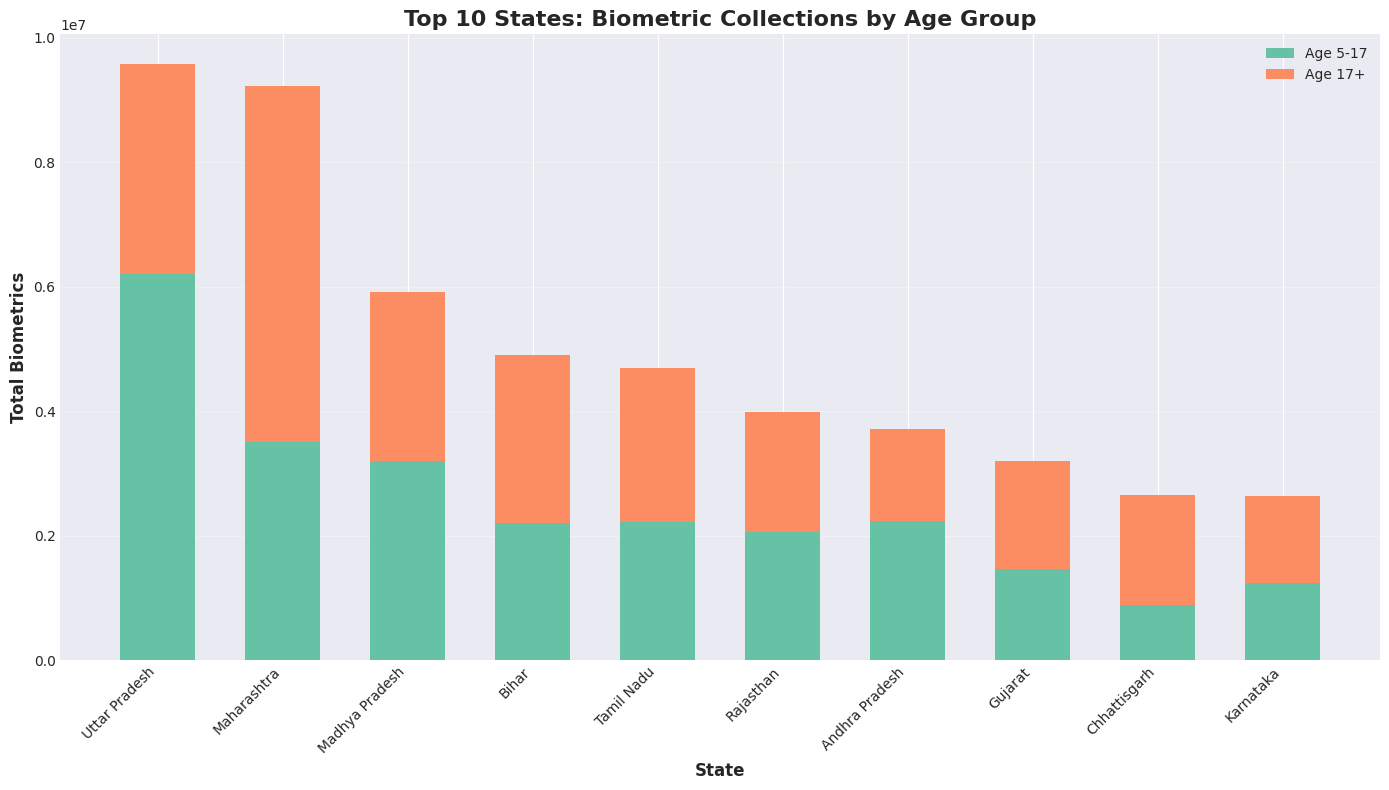

In [25]:
# Stacked bar chart - Age group distribution by top states
top_10_states = state_stats.head(10).index
state_age_data = df[df['state'].isin(top_10_states)].groupby('state').agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum'
}).loc[top_10_states]

fig, ax = plt.subplots(figsize=(14, 8))
x_pos = range(len(state_age_data))
width = 0.6

p1 = ax.bar(x_pos, state_age_data['bio_age_5_17'], width, label='Age 5-17', color='#66c2a5')
p2 = ax.bar(x_pos, state_age_data['bio_age_17_'], width, bottom=state_age_data['bio_age_5_17'], 
            label='Age 17+', color='#fc8d62')

ax.set_xlabel('State', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Biometrics', fontsize=12, fontweight='bold')
ax.set_title('Top 10 States: Biometric Collections by Age Group', fontsize=16, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(state_age_data.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 🔍 Advanced Analysis - Anomaly Detection

In [26]:
# Statistical anomaly detection using Z-score on total biometrics
from scipy import stats

daily_age_ts['z_score'] = np.abs(stats.zscore(daily_age_ts['total_biometrics']))
daily_age_ts['is_anomaly'] = daily_age_ts['z_score'] > 3

print("="*80)
print("ANOMALY DETECTION - TOTAL BIOMETRIC COLLECTIONS")
print("="*80)
print(f"\nTotal anomalies detected: {daily_age_ts['is_anomaly'].sum()}")
if daily_age_ts['is_anomaly'].sum() > 0:
    print(f"\nAnomalous days:")
    anomalies = daily_age_ts[daily_age_ts['is_anomaly']].sort_values('date')
    print(anomalies[['date', 'total_biometrics', 'bio_age_5_17', 'bio_age_17_', 'z_score']])
else:
    print("\n✓ No significant anomalies detected (Z-score > 3)")
print("="*80)

ANOMALY DETECTION - TOTAL BIOMETRIC COLLECTIONS

Total anomalies detected: 5

Anomalous days:
        date  total_biometrics  bio_age_5_17  bio_age_17_   z_score
0 2025-03-01           8322222       3733578      4588644  3.974626
1 2025-04-01           8641679       4356896      4284783  4.143061
2 2025-05-01           7879956       3868247      4011709  3.741440
3 2025-06-01           7899289       3710149      4189140  3.751633
4 2025-07-01           9792552       4499057      5293495  4.749862


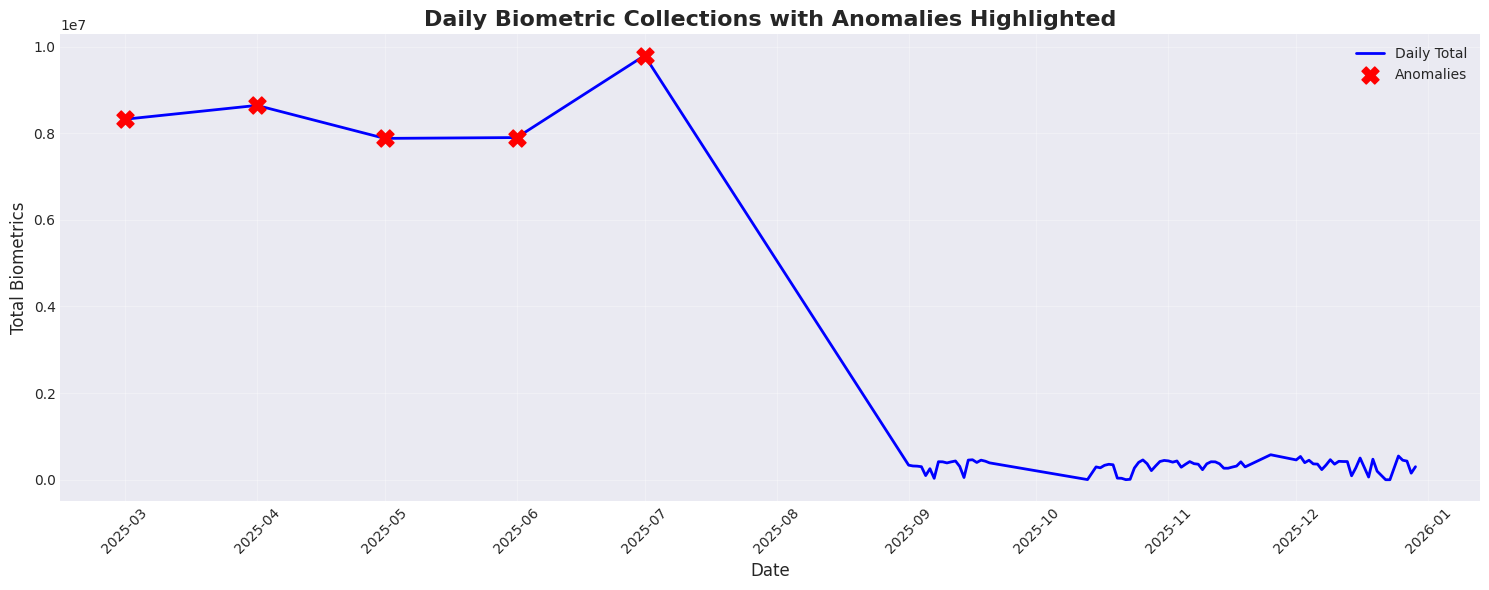

In [27]:
# Visualize anomalies
plt.figure(figsize=(15, 6))
plt.plot(daily_age_ts['date'], daily_age_ts['total_biometrics'], linewidth=2, label='Daily Total', color='blue')
if daily_age_ts['is_anomaly'].sum() > 0:
    anomaly_dates = daily_age_ts[daily_age_ts['is_anomaly']]
    plt.scatter(anomaly_dates['date'], anomaly_dates['total_biometrics'], color='red', s=150, 
                label='Anomalies', zorder=5, marker='X')
plt.title('Daily Biometric Collections with Anomalies Highlighted', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Biometrics', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 Correlation Analysis

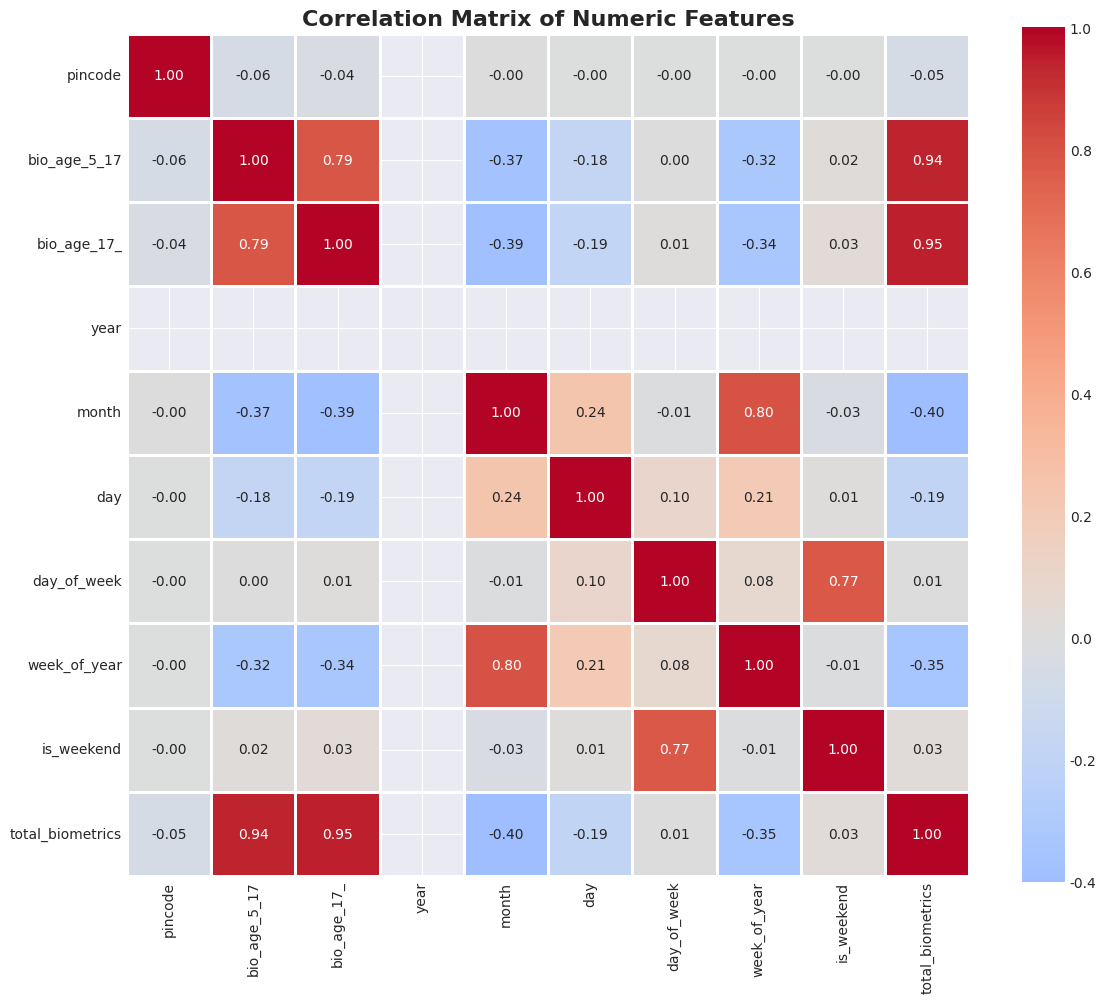

In [28]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 📋 Key Insights Summary

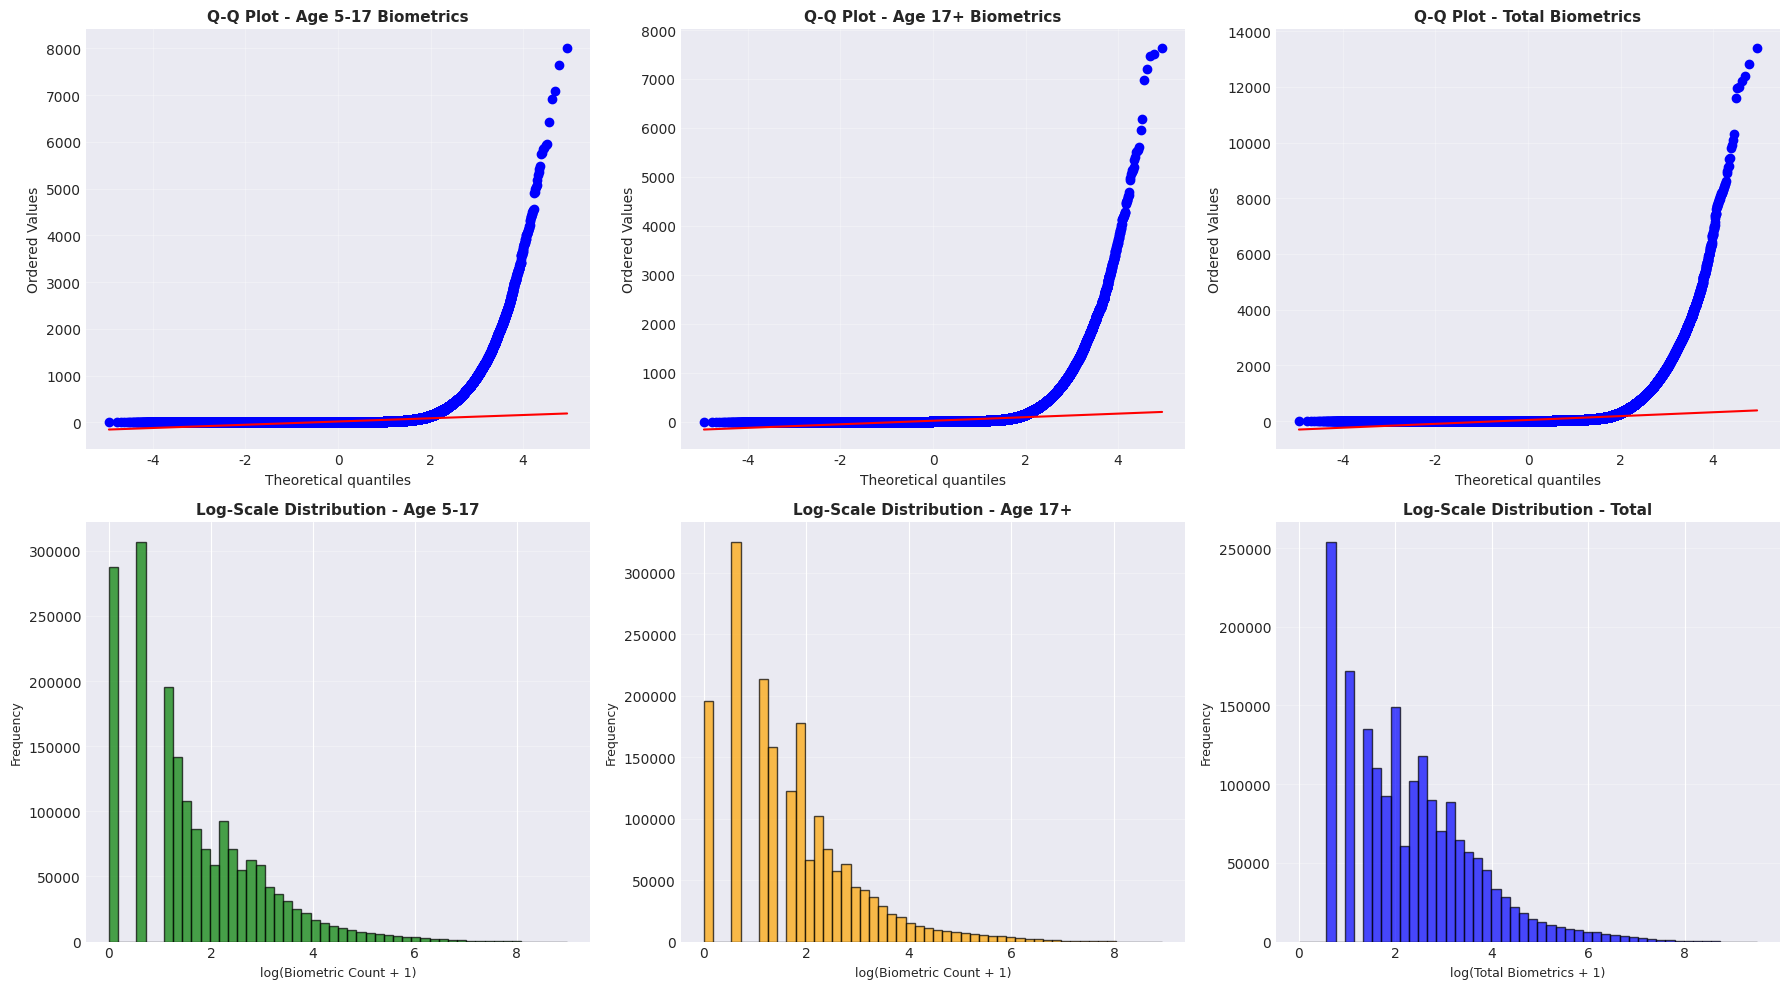

STATISTICAL DISTRIBUTION TESTS

Shapiro-Wilk Test for Normality (sample n=5000):
  Age 5-17:  W=0.1968, p-value=9.8705e-91 (Not Normal)
  Age 17+:   W=0.1753, p-value=2.4154e-91 (Not Normal)

Skewness:
  Age 5-17: 19.3306
  Age 17+:  18.0782

Kurtosis:
  Age 5-17: 709.5198
  Age 17+:  609.1431


In [29]:
# Advanced Statistical Analysis - Q-Q Plot and Distribution Tests
from scipy import stats as scipy_stats

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Q-Q Plot for Age 5-17
scipy_stats.probplot(df['bio_age_5_17'].dropna(), dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot - Age 5-17 Biometrics', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Q-Q Plot for Age 17+
scipy_stats.probplot(df['bio_age_17_'].dropna(), dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot - Age 17+ Biometrics', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q Plot for Total
scipy_stats.probplot(df['total_biometrics'].dropna(), dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot - Total Biometrics', fontsize=11, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Log-scale histograms
axes[1, 0].hist(np.log1p(df['bio_age_5_17']), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Log-Scale Distribution - Age 5-17', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('log(Biometric Count + 1)', fontsize=9)
axes[1, 0].set_ylabel('Frequency', fontsize=9)
axes[1, 0].grid(True, alpha=0.3, axis='y')

axes[1, 1].hist(np.log1p(df['bio_age_17_']), bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Log-Scale Distribution - Age 17+', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('log(Biometric Count + 1)', fontsize=9)
axes[1, 1].set_ylabel('Frequency', fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y')

axes[1, 2].hist(np.log1p(df['total_biometrics']), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Log-Scale Distribution - Total', fontsize=11, fontweight='bold')
axes[1, 2].set_xlabel('log(Total Biometrics + 1)', fontsize=9)
axes[1, 2].set_ylabel('Frequency', fontsize=9)
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical tests
print("="*80)
print("STATISTICAL DISTRIBUTION TESTS")
print("="*80)

# Shapiro-Wilk test for normality (on sample due to large dataset)
sample_size = min(5000, len(df))
sample_5_17 = df['bio_age_5_17'].sample(sample_size, random_state=42)
sample_17_plus = df['bio_age_17_'].sample(sample_size, random_state=42)

stat_5_17, p_5_17 = scipy_stats.shapiro(sample_5_17)
stat_17_plus, p_17_plus = scipy_stats.shapiro(sample_17_plus)

print(f"\nShapiro-Wilk Test for Normality (sample n={sample_size}):")
print(f"  Age 5-17:  W={stat_5_17:.4f}, p-value={p_5_17:.4e} {'(Not Normal)' if p_5_17 < 0.05 else '(Normal)'}")
print(f"  Age 17+:   W={stat_17_plus:.4f}, p-value={p_17_plus:.4e} {'(Not Normal)' if p_17_plus < 0.05 else '(Normal)'}")

# Skewness and Kurtosis
print(f"\nSkewness:")
print(f"  Age 5-17: {df['bio_age_5_17'].skew():.4f}")
print(f"  Age 17+:  {df['bio_age_17_'].skew():.4f}")

print(f"\nKurtosis:")
print(f"  Age 5-17: {df['bio_age_5_17'].kurtosis():.4f}")
print(f"  Age 17+:  {df['bio_age_17_'].kurtosis():.4f}")

print("="*80)

C:\Users\mkgaj\AppData\Local\Temp\ipykernel_25332\3512971398.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(tier_data, labels=[t.split()[0] for t in tier_order if t in state_performance['tier'].unique()])


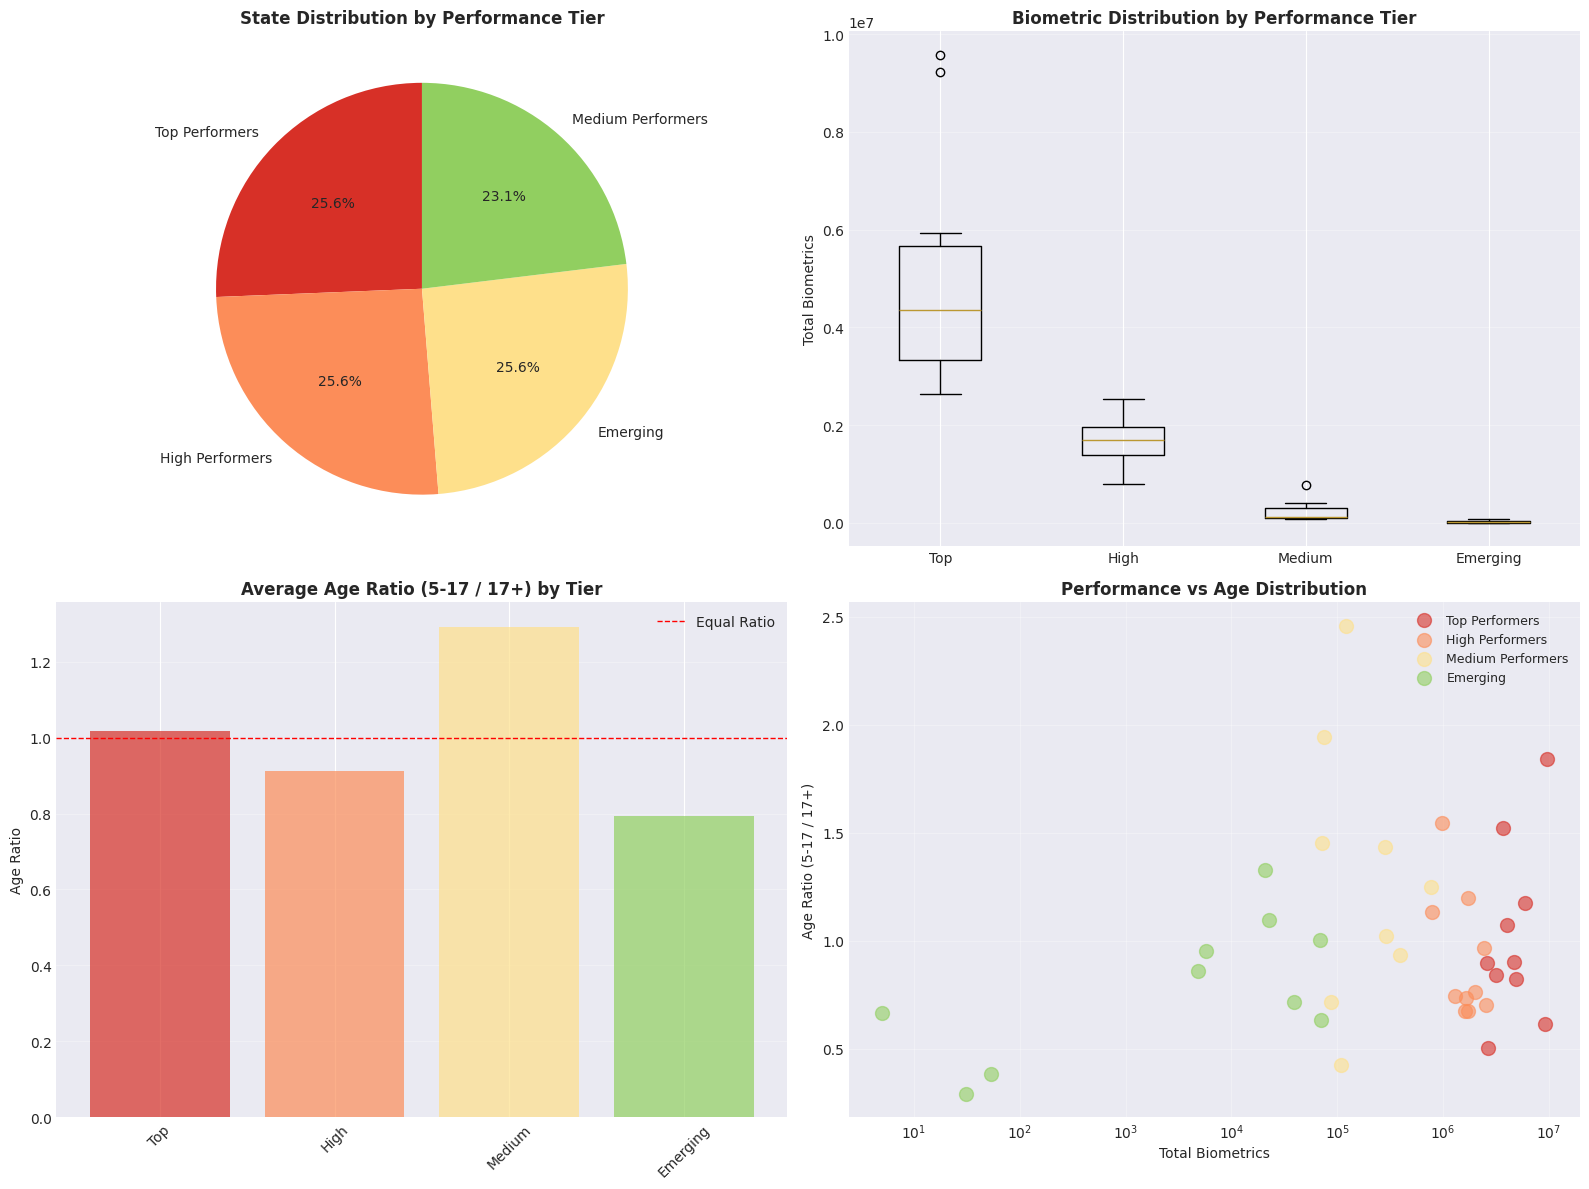

COHORT ANALYSIS - STATE PERFORMANCE SEGMENTATION

Top Performers:
  • Number of states: 10
  • Avg total biometrics: 5,051,414
  • Avg age ratio: 1.02
  • States: Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, Tamil Nadu ... (+5 more)

High Performers:
  • Number of states: 10
  • Avg total biometrics: 1,681,703
  • Avg age ratio: 0.91
  • States: West Bengal, Odisha, Jharkhand, Punjab, Telangana ... (+5 more)

Medium Performers:
  • Number of states: 9
  • Avg total biometrics: 244,463
  • Avg age ratio: 1.29
  • States: Uttarakhand, Himachal Pradesh, Tripura, Manipur, Mizoram ... (+4 more)

Emerging:
  • Number of states: 10
  • Avg total biometrics: 23,176
  • Avg age ratio: 0.79
  • States: Puducherry, Goa, Dadra and Nagar Haveli and Daman and Diu, Sikkim, Andaman and Nicobar Islands ... (+5 more)


In [30]:
# Cohort Analysis - State Performance Segmentation
# Segment states into performance tiers and analyze patterns

# Create performance tiers based on total biometrics
state_performance = state_stats[['total_biometrics', 'bio_age_5_17', 'bio_age_17_']].copy()
state_performance['avg_daily'] = daily_age_ts['total_biometrics'].mean()

# Define quartiles
q1 = state_performance['total_biometrics'].quantile(0.25)
q2 = state_performance['total_biometrics'].quantile(0.50)
q3 = state_performance['total_biometrics'].quantile(0.75)

def categorize_state(total):
    if total >= q3:
        return 'Top Performers'
    elif total >= q2:
        return 'High Performers'
    elif total >= q1:
        return 'Medium Performers'
    else:
        return 'Emerging'

state_performance['tier'] = state_performance['total_biometrics'].apply(categorize_state)
state_performance['age_ratio'] = state_performance['bio_age_5_17'] / state_performance['bio_age_17_']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Tier distribution
tier_counts = state_performance['tier'].value_counts()
colors_tier = ['#d73027', '#fc8d59', '#fee08b', '#91cf60']
axes[0, 0].pie(tier_counts.values, labels=tier_counts.index, autopct='%1.1f%%', 
               colors=colors_tier, startangle=90, textprops={'fontsize': 10})
axes[0, 0].set_title('State Distribution by Performance Tier', fontsize=12, fontweight='bold')

# Box plot by tier
tier_order = ['Top Performers', 'High Performers', 'Medium Performers', 'Emerging']
tier_data = [state_performance[state_performance['tier'] == tier]['total_biometrics'].values 
             for tier in tier_order if tier in state_performance['tier'].unique()]
axes[0, 1].boxplot(tier_data, labels=[t.split()[0] for t in tier_order if t in state_performance['tier'].unique()])
axes[0, 1].set_title('Biometric Distribution by Performance Tier', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Total Biometrics', fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Age ratio by tier
tier_age_ratio = state_performance.groupby('tier')['age_ratio'].mean().reindex(tier_order)
tier_age_ratio = tier_age_ratio.dropna()
axes[1, 0].bar(range(len(tier_age_ratio)), tier_age_ratio.values, color=colors_tier[:len(tier_age_ratio)], alpha=0.7)
axes[1, 0].set_xticks(range(len(tier_age_ratio)))
axes[1, 0].set_xticklabels([t.split()[0] for t in tier_age_ratio.index], rotation=45)
axes[1, 0].set_title('Average Age Ratio (5-17 / 17+) by Tier', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Age Ratio', fontsize=10)
axes[1, 0].axhline(y=1, color='red', linestyle='--', linewidth=1, label='Equal Ratio')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Scatter: Total vs Age Ratio, colored by tier
for tier, color in zip(tier_order, colors_tier):
    tier_data = state_performance[state_performance['tier'] == tier]
    axes[1, 1].scatter(tier_data['total_biometrics'], tier_data['age_ratio'], 
                      s=100, alpha=0.6, label=tier, color=color)
axes[1, 1].set_xlabel('Total Biometrics', fontsize=10)
axes[1, 1].set_ylabel('Age Ratio (5-17 / 17+)', fontsize=10)
axes[1, 1].set_title('Performance vs Age Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

# Print cohort analysis
print("="*80)
print("COHORT ANALYSIS - STATE PERFORMANCE SEGMENTATION")
print("="*80)
for tier in tier_order:
    tier_states = state_performance[state_performance['tier'] == tier]
    if len(tier_states) > 0:
        print(f"\n{tier}:")
        print(f"  • Number of states: {len(tier_states)}")
        print(f"  • Avg total biometrics: {tier_states['total_biometrics'].mean():,.0f}")
        print(f"  • Avg age ratio: {tier_states['age_ratio'].mean():.2f}")
        print(f"  • States: {', '.join(tier_states.head(5).index.tolist())}", end='')
        if len(tier_states) > 5:
            print(f" ... (+{len(tier_states)-5} more)")
        else:
            print()
print("="*80)

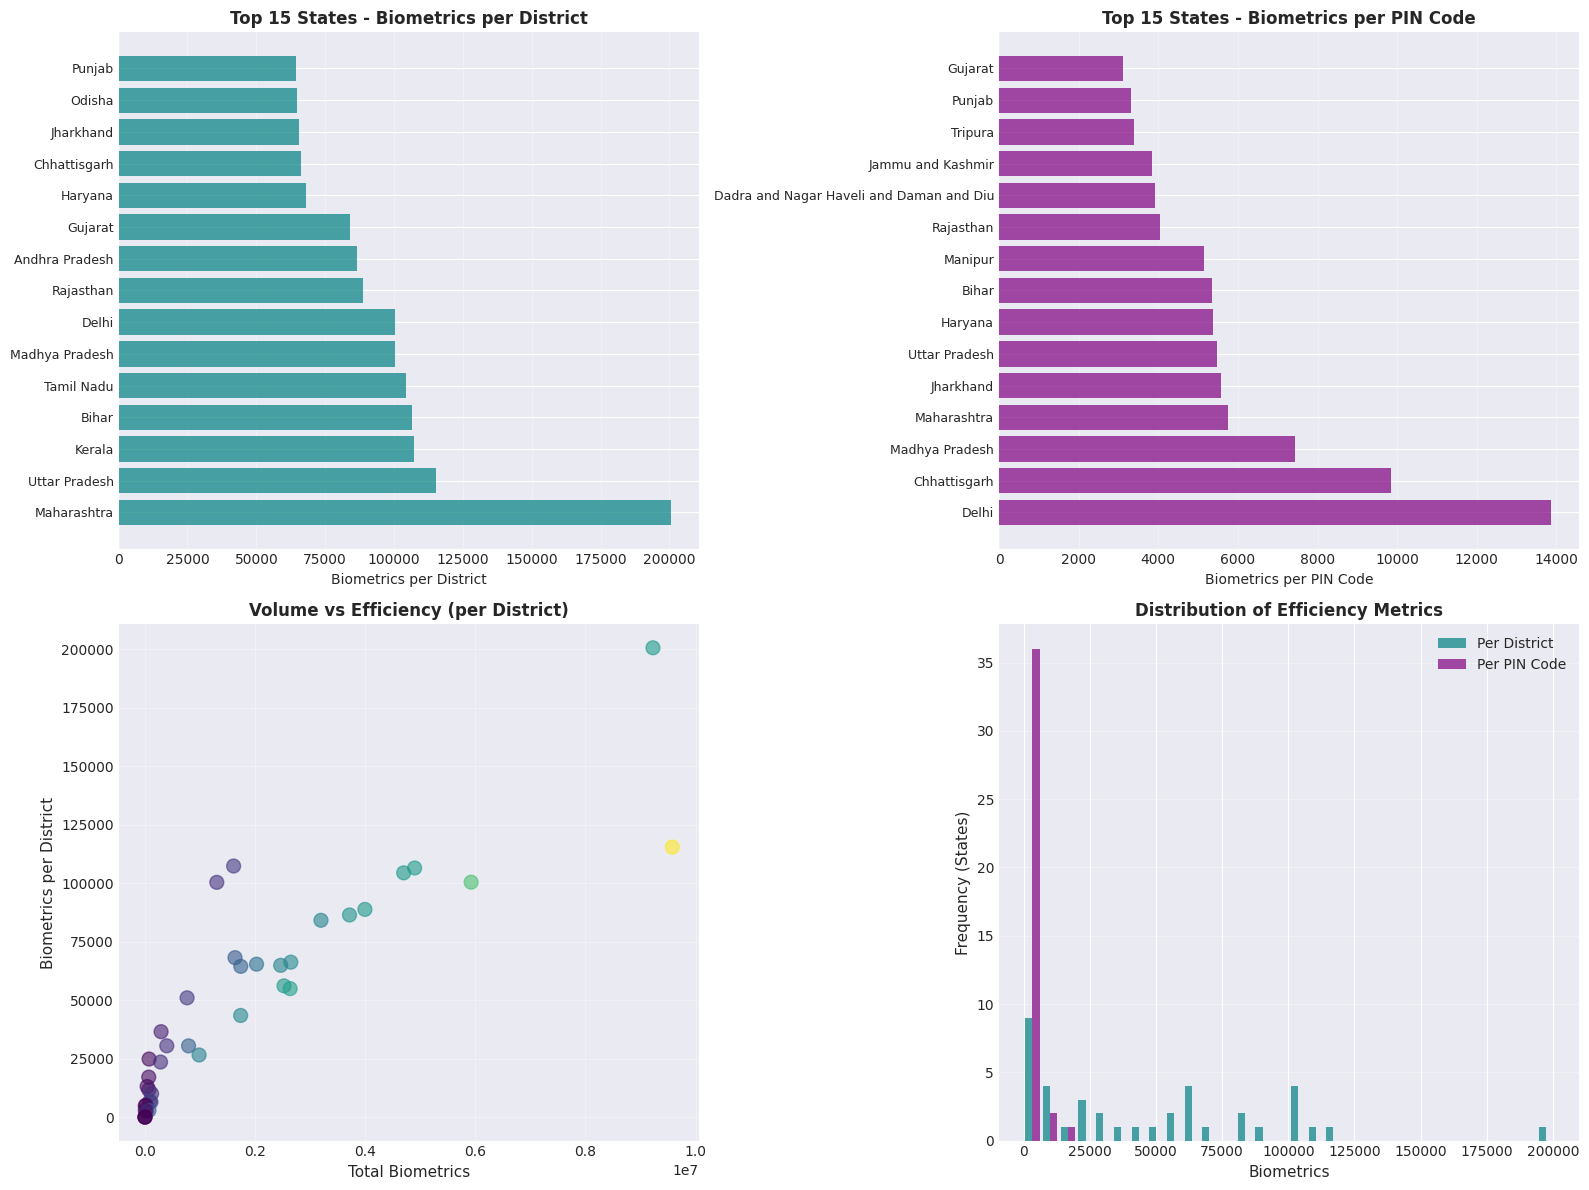

EFFICIENCY METRICS

Top 5 States by Biometrics per District:
  1. Maharashtra: 200,568 biometrics/district
  2. Uttar Pradesh: 115,394 biometrics/district
  3. Kerala: 107,315 biometrics/district
  4. Bihar: 106,469 biometrics/district
  5. Tamil Nadu: 104,403 biometrics/district

Top 5 States by Biometrics per PIN Code:
  1. Delhi: 13,876 biometrics/pincode
  2. Chhattisgarh: 9,847 biometrics/pincode
  3. Madhya Pradesh: 7,433 biometrics/pincode
  4. Maharashtra: 5,741 biometrics/pincode
  5. Jharkhand: 5,567 biometrics/pincode


In [31]:
# Efficiency Metrics - Biometrics per District and per Pincode
state_efficiency = df.groupby('state').agg({
    'total_biometrics': 'sum',
    'district': 'nunique',
    'pincode': 'nunique',
    'date': 'count'
}).rename(columns={'date': 'records'})

state_efficiency['bio_per_district'] = state_efficiency['total_biometrics'] / state_efficiency['district']
state_efficiency['bio_per_pincode'] = state_efficiency['total_biometrics'] / state_efficiency['pincode']
state_efficiency['bio_per_record'] = state_efficiency['total_biometrics'] / state_efficiency['records']

state_efficiency = state_efficiency.sort_values('bio_per_district', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 states by biometrics per district
top_15_eff_dist = state_efficiency.head(15)
axes[0, 0].barh(range(len(top_15_eff_dist)), top_15_eff_dist['bio_per_district'], color='teal', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_15_eff_dist)))
axes[0, 0].set_yticklabels(top_15_eff_dist.index, fontsize=9)
axes[0, 0].set_title('Top 15 States - Biometrics per District', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Biometrics per District', fontsize=10)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top 15 states by biometrics per pincode
state_efficiency_pin = state_efficiency.sort_values('bio_per_pincode', ascending=False).head(15)
axes[0, 1].barh(range(len(state_efficiency_pin)), state_efficiency_pin['bio_per_pincode'], color='purple', alpha=0.7)
axes[0, 1].set_yticks(range(len(state_efficiency_pin)))
axes[0, 1].set_yticklabels(state_efficiency_pin.index, fontsize=9)
axes[0, 1].set_title('Top 15 States - Biometrics per PIN Code', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Biometrics per PIN Code', fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Scatter plot - Efficiency vs Volume
axes[1, 0].scatter(state_efficiency['total_biometrics'], state_efficiency['bio_per_district'], 
                   s=100, alpha=0.6, c=state_efficiency['district'], cmap='viridis')
axes[1, 0].set_xlabel('Total Biometrics', fontsize=11)
axes[1, 0].set_ylabel('Biometrics per District', fontsize=11)
axes[1, 0].set_title('Volume vs Efficiency (per District)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Distribution of efficiency metrics
axes[1, 1].hist([state_efficiency['bio_per_district'], state_efficiency['bio_per_pincode']], 
                bins=30, label=['Per District', 'Per PIN Code'], alpha=0.7, color=['teal', 'purple'])
axes[1, 1].set_xlabel('Biometrics', fontsize=11)
axes[1, 1].set_ylabel('Frequency (States)', fontsize=11)
axes[1, 1].set_title('Distribution of Efficiency Metrics', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print efficiency statistics
print("="*80)
print("EFFICIENCY METRICS")
print("="*80)
print(f"\nTop 5 States by Biometrics per District:")
for idx, (state, row) in enumerate(state_efficiency.head(5).iterrows(), 1):
    print(f"  {idx}. {state}: {row['bio_per_district']:,.0f} biometrics/district")

state_efficiency_pin_sorted = state_efficiency.sort_values('bio_per_pincode', ascending=False)
print(f"\nTop 5 States by Biometrics per PIN Code:")
for idx, (state, row) in enumerate(state_efficiency_pin_sorted.head(5).iterrows(), 1):
    print(f"  {idx}. {state}: {row['bio_per_pincode']:,.0f} biometrics/pincode")
print("="*80)

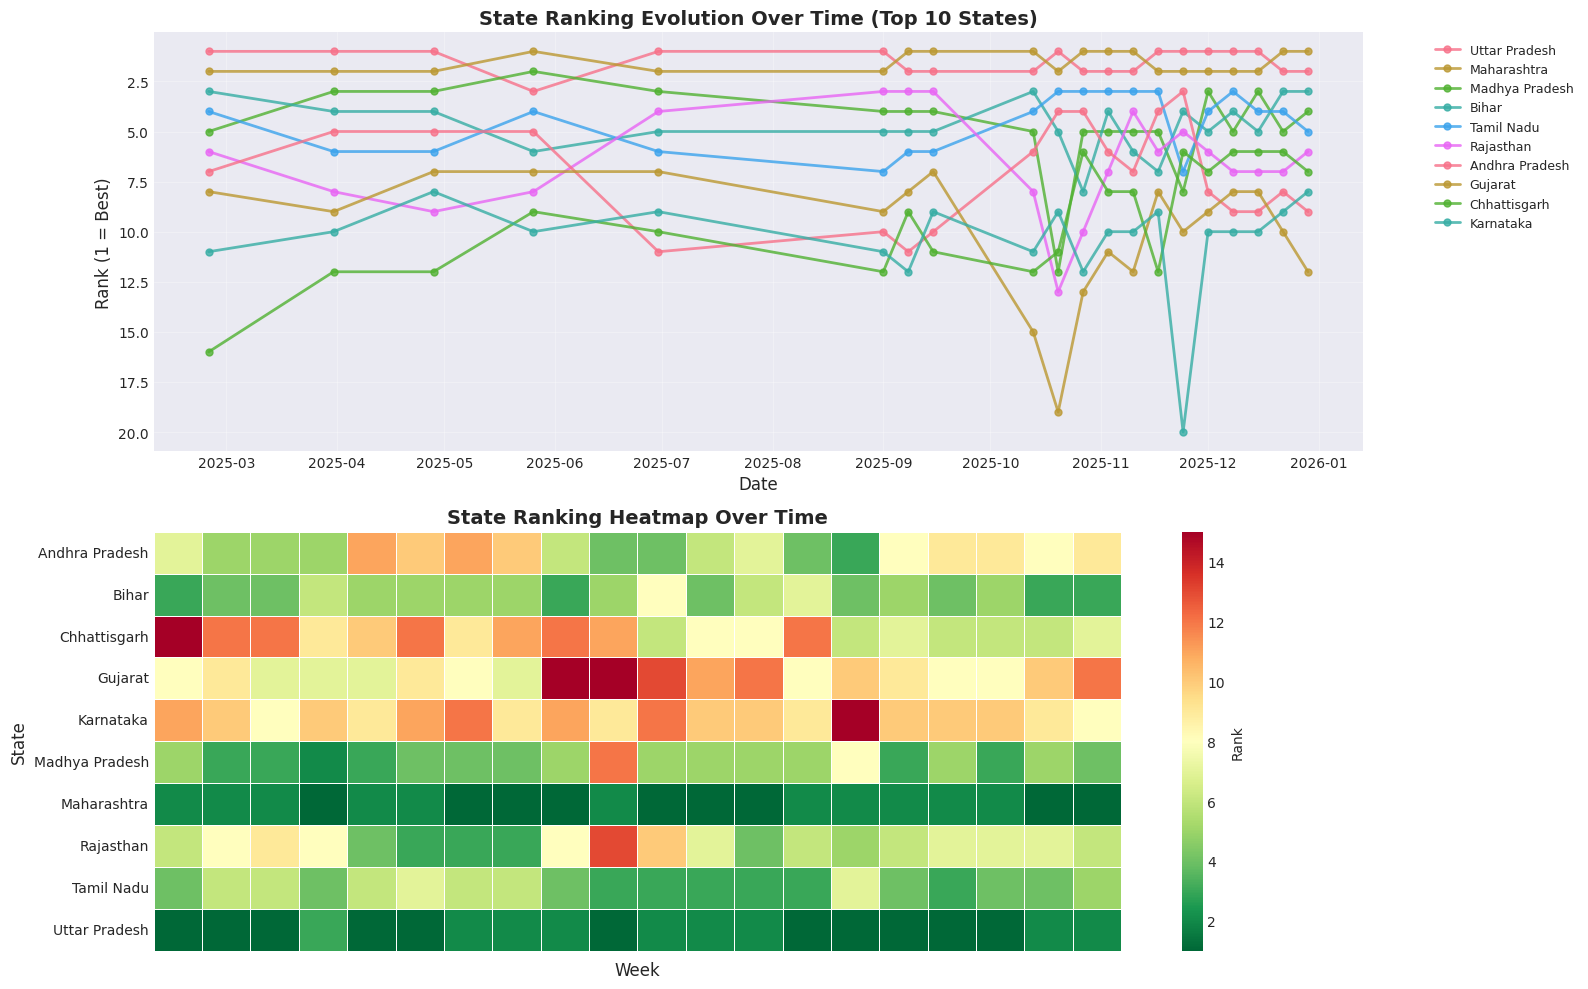

In [32]:
# Performance Ranking Over Time - Top States Evolution
# Shows how state rankings change over time

# Calculate weekly rankings
weekly_state_totals = df.groupby([df['date'].dt.to_period('W'), 'state'])['total_biometrics'].sum().reset_index()
weekly_state_totals['date'] = weekly_state_totals['date'].dt.to_timestamp()
weekly_state_totals['rank'] = weekly_state_totals.groupby('date')['total_biometrics'].rank(ascending=False, method='min')

# Focus on top 10 states overall
top_10_overall = state_stats.head(10).index.tolist()
weekly_ranks = weekly_state_totals[weekly_state_totals['state'].isin(top_10_overall)]

# Create ranking evolution plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Line plot showing rank evolution
for state in top_10_overall:
    state_data = weekly_ranks[weekly_ranks['state'] == state].sort_values('date')
    ax1.plot(state_data['date'], state_data['rank'], marker='o', linewidth=2, markersize=5, label=state, alpha=0.8)

ax1.set_title('State Ranking Evolution Over Time (Top 10 States)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Rank (1 = Best)', fontsize=12)
ax1.invert_yaxis()
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# Heatmap of ranks
pivot_ranks = weekly_ranks.pivot(index='state', columns='date', values='rank')
sns.heatmap(pivot_ranks, cmap='RdYlGn_r', ax=ax2, cbar_kws={'label': 'Rank'}, 
            fmt='.0f', linewidths=0.5, vmin=1, vmax=15)
ax2.set_title('State Ranking Heatmap Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Week', fontsize=12)
ax2.set_ylabel('State', fontsize=12)
ax2.set_xticklabels([])  # Too many weeks to show all labels

plt.tight_layout()
plt.show()

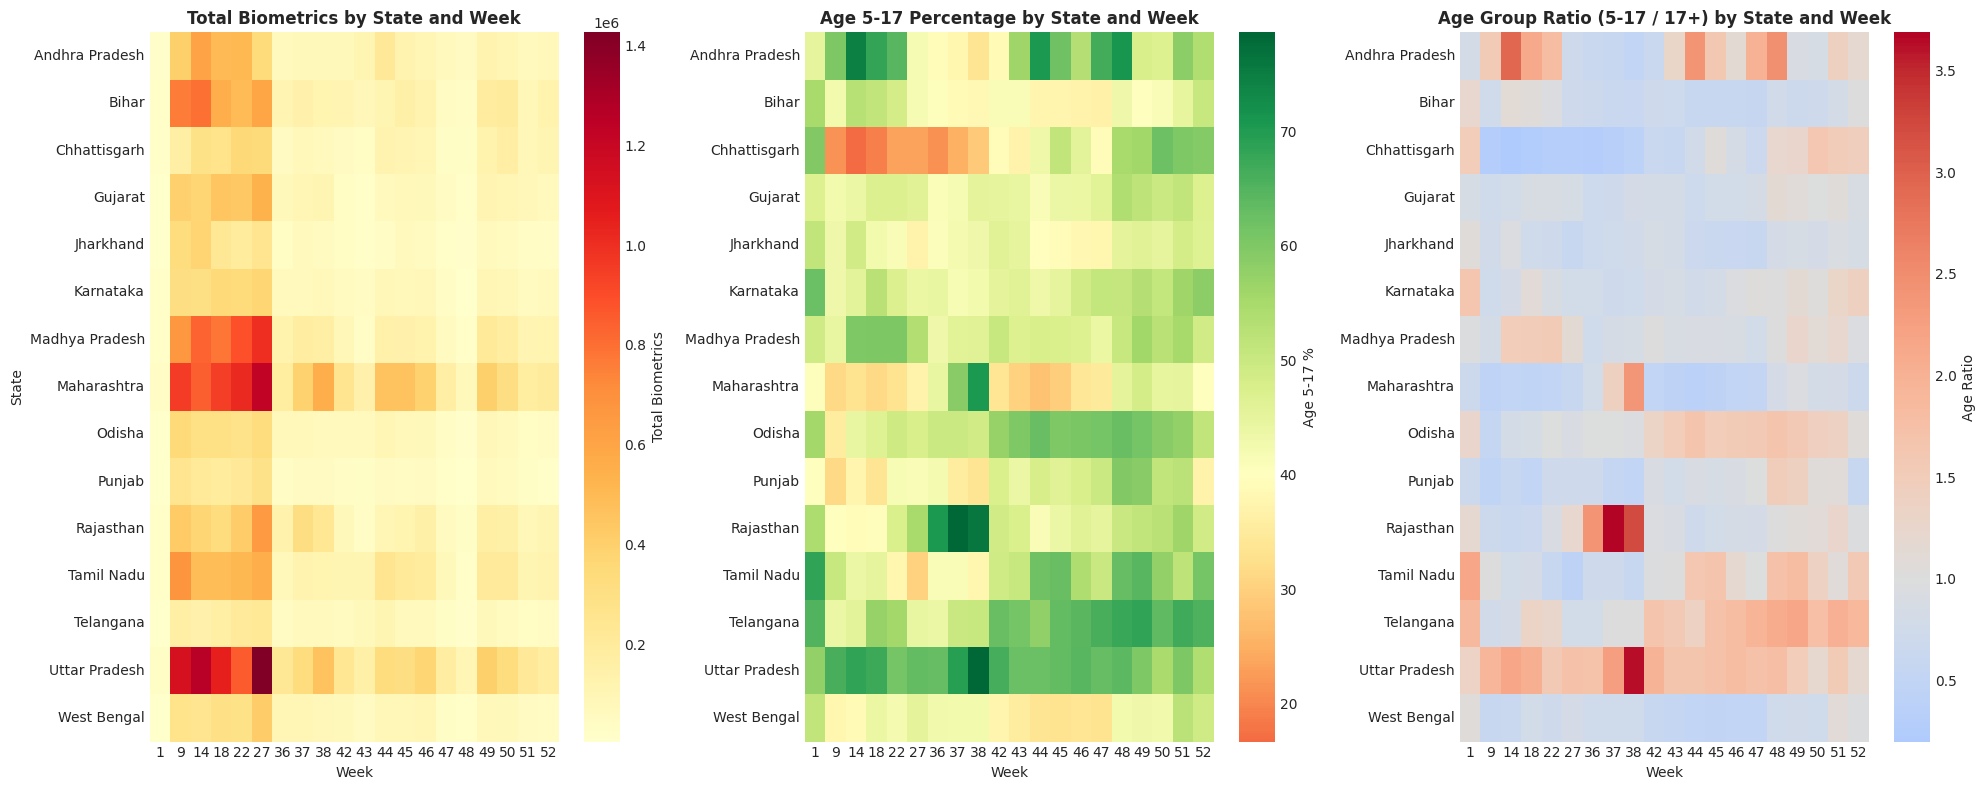

In [33]:
# Multi-dimensional Heatmap - State x Week x Age Group
# Shows temporal patterns across states and age groups

# Get weekly data for top 15 states
top_15_states = state_stats.head(15).index.tolist()
df_top_15 = df[df['state'].isin(top_15_states)].copy()
df_top_15['week'] = df_top_15['date'].dt.isocalendar().week

# Calculate age group ratio (Age 5-17 / Age 17+)
weekly_state_age = df_top_15.groupby(['state', 'week']).agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum',
    'total_biometrics': 'sum'
}).reset_index()

weekly_state_age['age_ratio'] = weekly_state_age['bio_age_5_17'] / (weekly_state_age['bio_age_17_'] + 1)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Heatmap 1: Total Biometrics by State and Week
pivot_total = weekly_state_age.pivot(index='state', columns='week', values='total_biometrics')
sns.heatmap(pivot_total, cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Total Biometrics'}, fmt='.0f')
axes[0].set_title('Total Biometrics by State and Week', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Week', fontsize=10)
axes[0].set_ylabel('State', fontsize=10)

# Heatmap 2: Age 5-17 Percentage
weekly_state_age['pct_5_17'] = (weekly_state_age['bio_age_5_17'] / weekly_state_age['total_biometrics'] * 100)
pivot_pct = weekly_state_age.pivot(index='state', columns='week', values='pct_5_17')
sns.heatmap(pivot_pct, cmap='RdYlGn', ax=axes[1], cbar_kws={'label': 'Age 5-17 %'}, fmt='.1f', center=40)
axes[1].set_title('Age 5-17 Percentage by State and Week', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Week', fontsize=10)
axes[1].set_ylabel('')

# Heatmap 3: Age Group Ratio
pivot_ratio = weekly_state_age.pivot(index='state', columns='week', values='age_ratio')
sns.heatmap(pivot_ratio, cmap='coolwarm', ax=axes[2], cbar_kws={'label': 'Age Ratio'}, fmt='.2f', center=1)
axes[2].set_title('Age Group Ratio (5-17 / 17+) by State and Week', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Week', fontsize=10)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

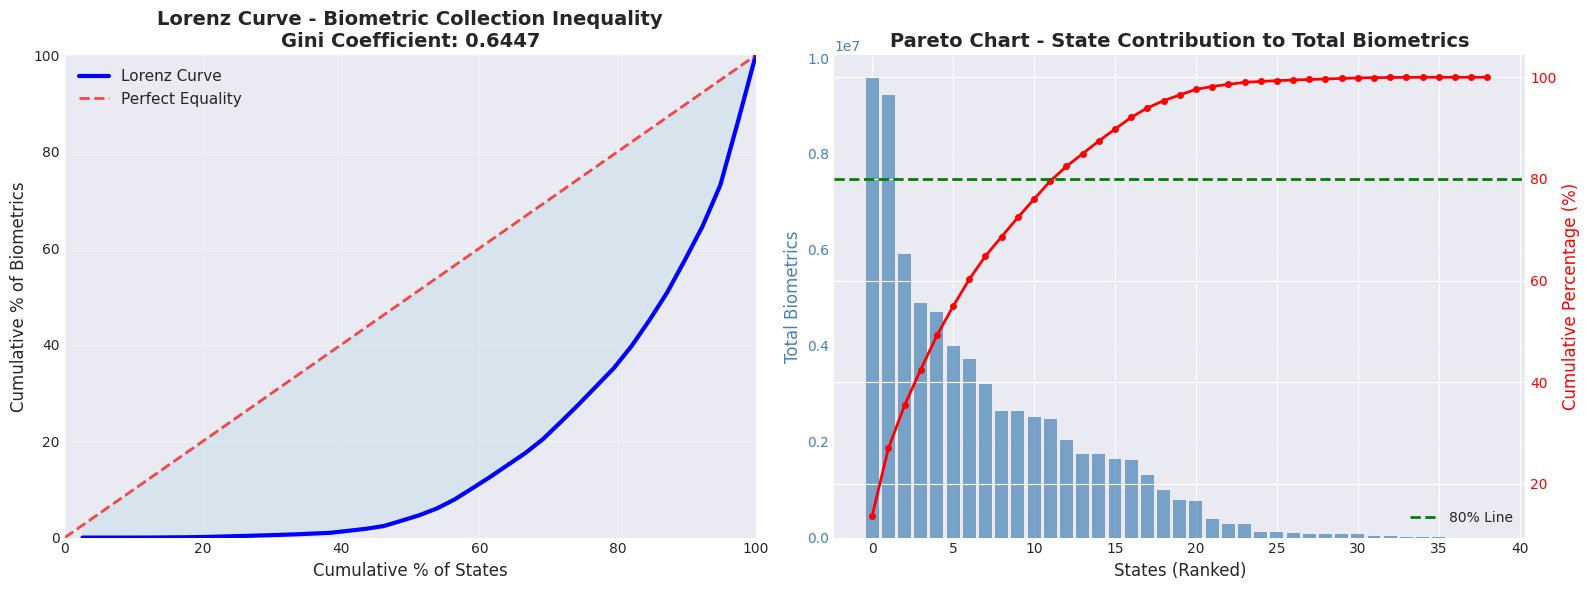

CONCENTRATION ANALYSIS

Gini Coefficient: 0.6447
  (0 = perfect equality, 1 = perfect inequality)

Top states contributing to 80% of biometrics:
  • Number of states: 12 out of 39 (30.8%)
  • States: Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, Tamil Nadu, Rajasthan, Andhra Pradesh, Gujarat, Chhattisgarh, Karnataka, West Bengal, Odisha


In [34]:
# Concentration Analysis - Lorenz Curve and Gini Coefficient
# Shows inequality in biometric collection distribution across states

state_totals = df.groupby('state')['total_biometrics'].sum().sort_values()
cumulative_states = np.arange(1, len(state_totals) + 1) / len(state_totals) * 100
cumulative_biometrics = state_totals.cumsum() / state_totals.sum() * 100

# Calculate Gini Coefficient
def gini_coefficient(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum((np.arange(1, n+1)) * sorted_x)) / (n * cumsum[-1]) - (n + 1) / n

gini = gini_coefficient(state_totals.values)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Lorenz Curve
ax1.plot(cumulative_states, cumulative_biometrics, linewidth=3, label='Lorenz Curve', color='blue')
ax1.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Equality', alpha=0.7)
ax1.fill_between(cumulative_states, cumulative_biometrics, cumulative_states, alpha=0.3, color='lightblue')
ax1.set_title(f'Lorenz Curve - Biometric Collection Inequality\nGini Coefficient: {gini:.4f}', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Cumulative % of States', fontsize=12)
ax1.set_ylabel('Cumulative % of Biometrics', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)

# Pareto Chart (80-20 rule)
state_totals_desc = df.groupby('state')['total_biometrics'].sum().sort_values(ascending=False)
cumulative_pct = (state_totals_desc.cumsum() / state_totals_desc.sum() * 100).values
x_pos = np.arange(len(state_totals_desc))

ax1_twin = ax2.twinx()
ax2.bar(x_pos, state_totals_desc.values, color='steelblue', alpha=0.7)
ax1_twin.plot(x_pos, cumulative_pct, color='red', marker='o', linewidth=2, markersize=4)
ax1_twin.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% Line')

ax2.set_title('Pareto Chart - State Contribution to Total Biometrics', fontsize=14, fontweight='bold')
ax2.set_xlabel('States (Ranked)', fontsize=12)
ax2.set_ylabel('Total Biometrics', fontsize=12, color='steelblue')
ax1_twin.set_ylabel('Cumulative Percentage (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1_twin.legend(loc='lower right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Find states contributing to 80%
cumsum_pct = (state_totals_desc.cumsum() / state_totals_desc.sum() * 100)
states_80_pct = cumsum_pct[cumsum_pct <= 80]
print("="*80)
print("CONCENTRATION ANALYSIS")
print("="*80)
print(f"\nGini Coefficient: {gini:.4f}")
print(f"  (0 = perfect equality, 1 = perfect inequality)")
print(f"\nTop states contributing to 80% of biometrics:")
print(f"  • Number of states: {len(states_80_pct)} out of {len(state_totals)} ({len(states_80_pct)/len(state_totals)*100:.1f}%)")
print(f"  • States: {', '.join(states_80_pct.index.tolist())}")
print("="*80)

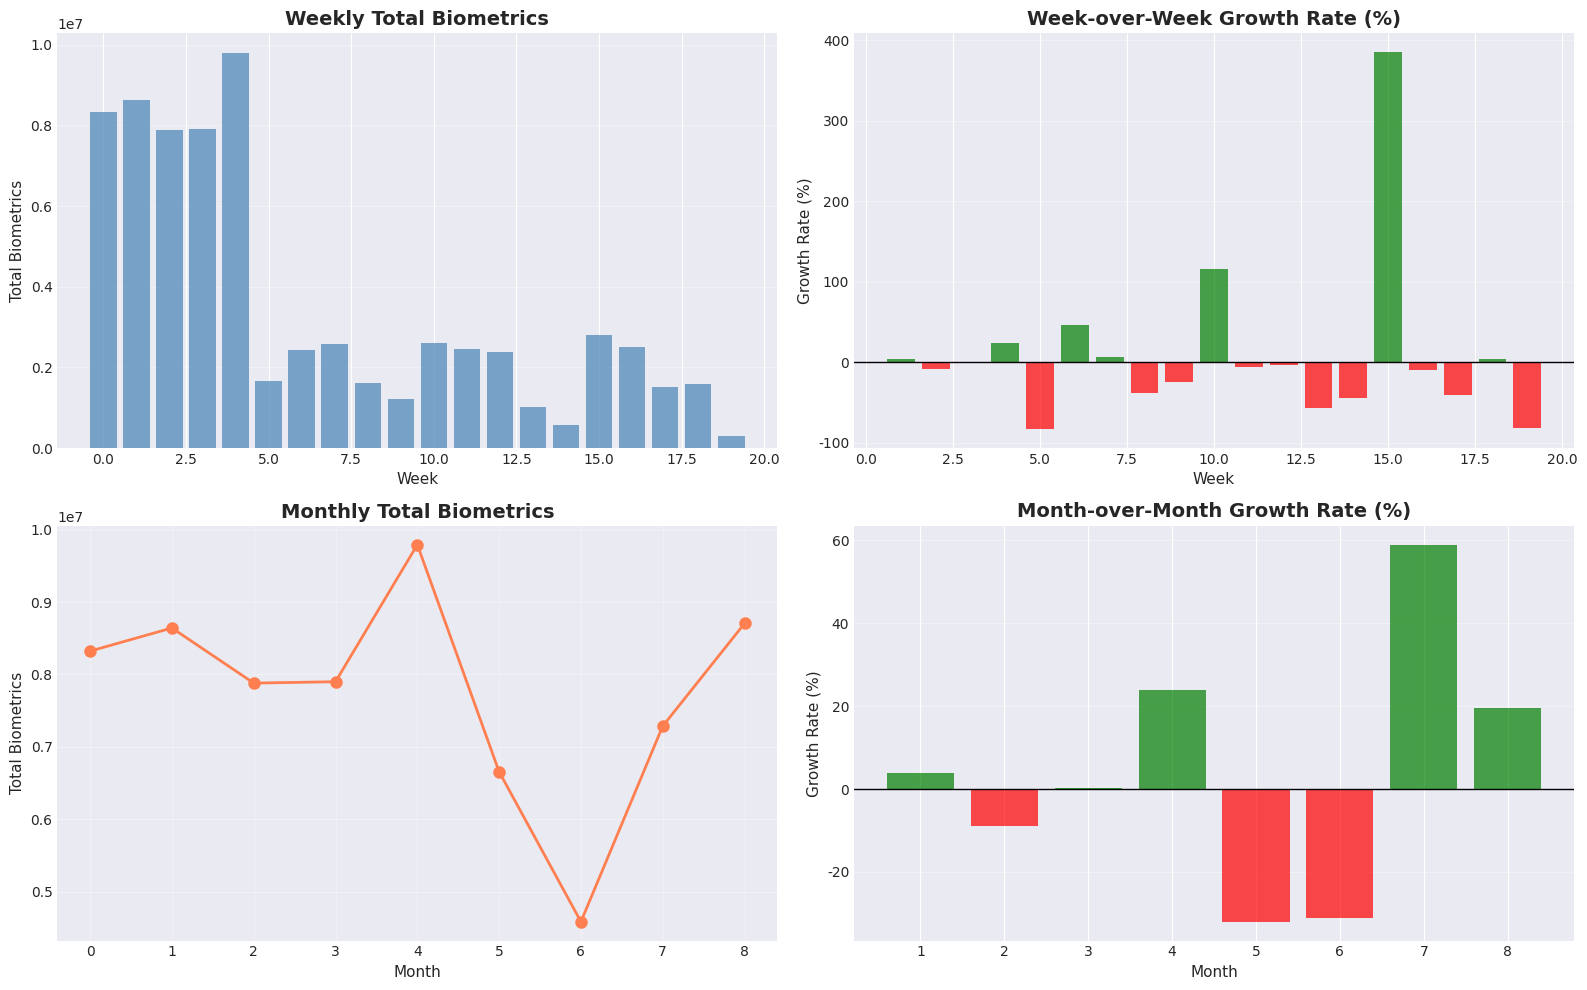

GROWTH RATE STATISTICS

Week-over-Week Growth:
  • Average: 10.09%
  • Std Dev: 101.39%
  • Max Growth: 385.09%
  • Max Decline: -83.13%

Month-over-Month Growth:
  • Average: 4.31%
  • Std Dev: 30.17%
  • Max Growth: 58.98%
  • Max Decline: -32.04%


In [35]:
# Growth Rate Analysis - Week-over-Week and Month-over-Month
weekly_totals = df.groupby(df['date'].dt.to_period('W'))['total_biometrics'].sum().reset_index()
weekly_totals['date'] = weekly_totals['date'].dt.to_timestamp()
weekly_totals['wow_growth'] = weekly_totals['total_biometrics'].pct_change() * 100

monthly_totals = df.groupby(df['date'].dt.to_period('M'))['total_biometrics'].sum().reset_index()
monthly_totals['date'] = monthly_totals['date'].dt.to_timestamp()
monthly_totals['mom_growth'] = monthly_totals['total_biometrics'].pct_change() * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Weekly Totals
axes[0, 0].bar(range(len(weekly_totals)), weekly_totals['total_biometrics'], color='steelblue', alpha=0.7)
axes[0, 0].set_title('Weekly Total Biometrics', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Week', fontsize=11)
axes[0, 0].set_ylabel('Total Biometrics', fontsize=11)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Week-over-Week Growth Rate
colors_wow = ['green' if x >= 0 else 'red' for x in weekly_totals['wow_growth'].dropna()]
axes[0, 1].bar(range(1, len(weekly_totals)), weekly_totals['wow_growth'].dropna(), color=colors_wow, alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].set_title('Week-over-Week Growth Rate (%)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Week', fontsize=11)
axes[0, 1].set_ylabel('Growth Rate (%)', fontsize=11)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Monthly Totals
axes[1, 0].plot(range(len(monthly_totals)), monthly_totals['total_biometrics'], 
                marker='o', linewidth=2, markersize=8, color='coral')
axes[1, 0].set_title('Monthly Total Biometrics', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Total Biometrics', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# Month-over-Month Growth Rate
colors_mom = ['green' if x >= 0 else 'red' for x in monthly_totals['mom_growth'].dropna()]
axes[1, 1].bar(range(1, len(monthly_totals)), monthly_totals['mom_growth'].dropna(), color=colors_mom, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].set_title('Month-over-Month Growth Rate (%)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Growth Rate (%)', fontsize=11)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print growth statistics
print("="*80)
print("GROWTH RATE STATISTICS")
print("="*80)
print(f"\nWeek-over-Week Growth:")
print(f"  • Average: {weekly_totals['wow_growth'].mean():.2f}%")
print(f"  • Std Dev: {weekly_totals['wow_growth'].std():.2f}%")
print(f"  • Max Growth: {weekly_totals['wow_growth'].max():.2f}%")
print(f"  • Max Decline: {weekly_totals['wow_growth'].min():.2f}%")

print(f"\nMonth-over-Month Growth:")
print(f"  • Average: {monthly_totals['mom_growth'].mean():.2f}%")
print(f"  • Std Dev: {monthly_totals['mom_growth'].std():.2f}%")
print(f"  • Max Growth: {monthly_totals['mom_growth'].max():.2f}%")
print(f"  • Max Decline: {monthly_totals['mom_growth'].min():.2f}%")
print("="*80)

C:\Users\mkgaj\AppData\Local\Temp\ipykernel_25332\3383549215.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  detrended = time_series - trend.fillna(method='bfill').fillna(method='ffill')


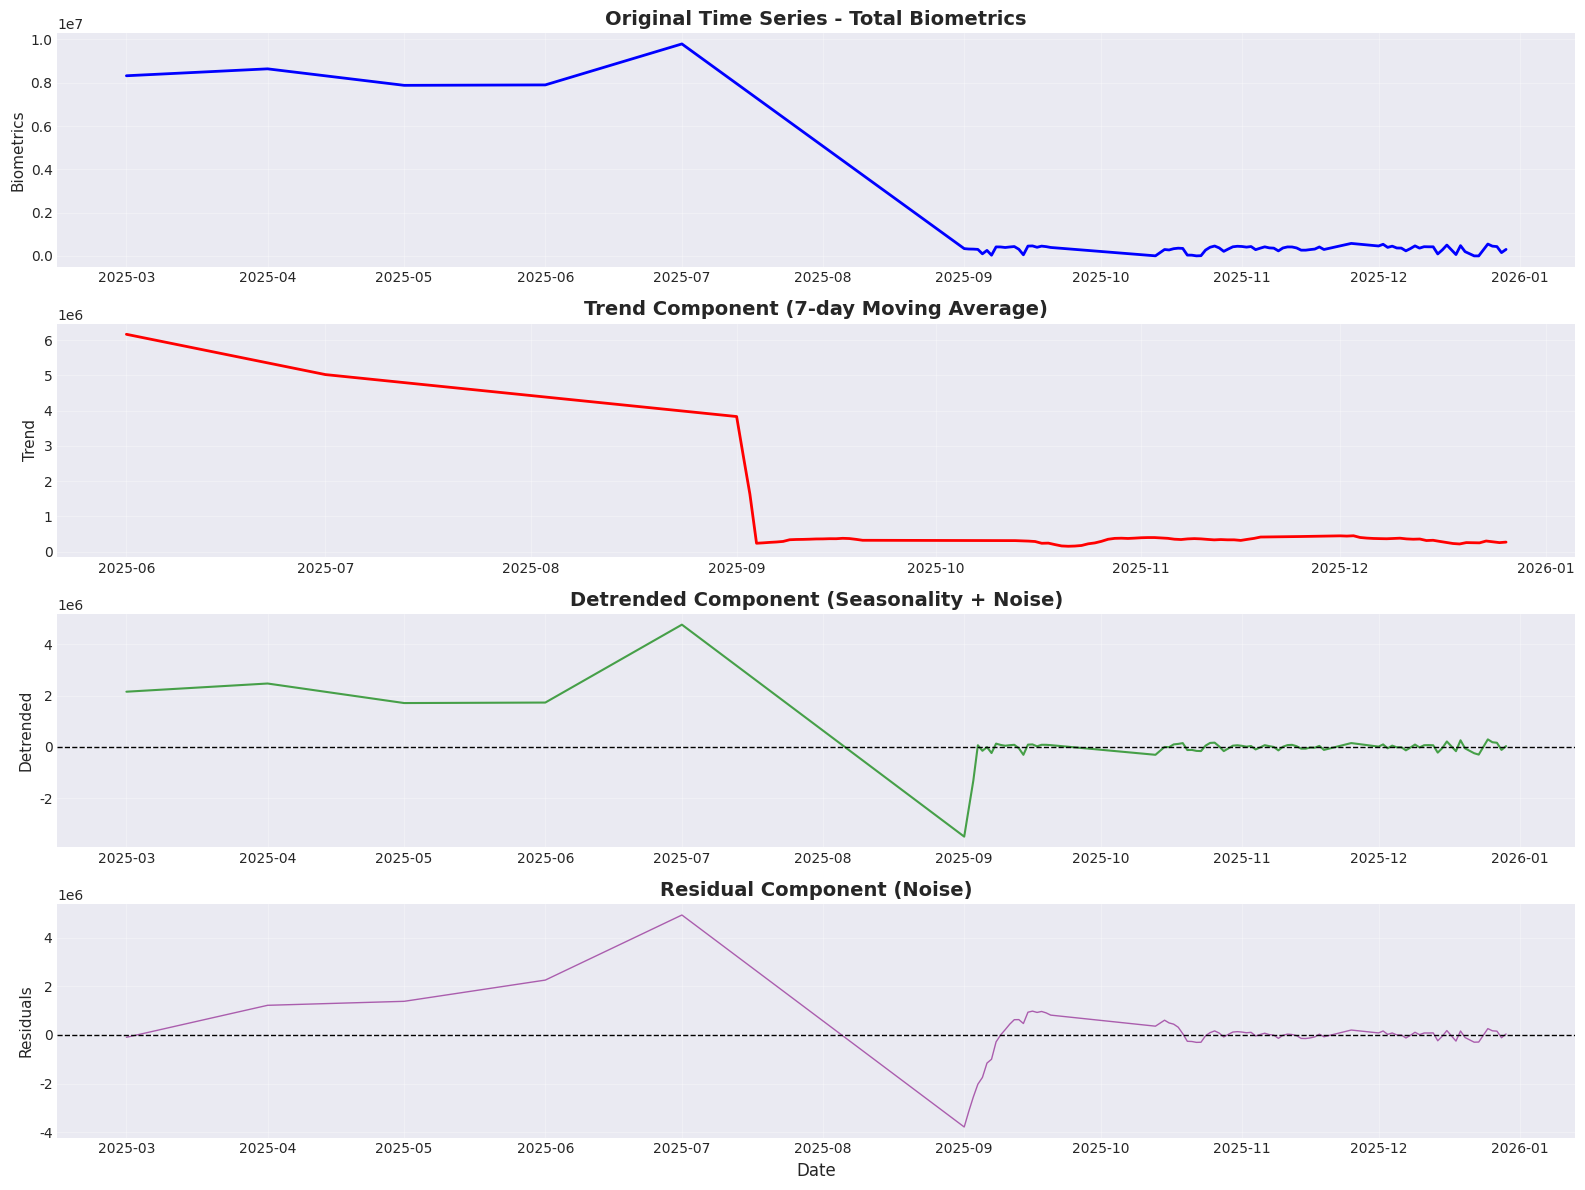

In [36]:
# Time Series Decomposition Analysis
from scipy import signal

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Sort by date
daily_sorted = daily_age_ts.sort_values('date').reset_index(drop=True)
time_series = daily_sorted['total_biometrics'].values

# Original Time Series
axes[0].plot(daily_sorted['date'], time_series, linewidth=2, color='blue')
axes[0].set_title('Original Time Series - Total Biometrics', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Biometrics', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Trend (Moving Average)
window = 7  # 7-day moving average
trend = pd.Series(time_series).rolling(window=window, center=True).mean()
axes[1].plot(daily_sorted['date'], trend, linewidth=2, color='red')
axes[1].set_title(f'Trend Component ({window}-day Moving Average)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Detrended (Original - Trend)
detrended = time_series - trend.fillna(method='bfill').fillna(method='ffill')
axes[2].plot(daily_sorted['date'], detrended, linewidth=1.5, color='green', alpha=0.7)
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[2].set_title('Detrended Component (Seasonality + Noise)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Detrended', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Residuals (using Savitzky-Golay filter for smoothing)
if len(time_series) > 50:
    smoothed = signal.savgol_filter(time_series, window_length=min(51, len(time_series)//2*2-1), polyorder=3)
    residuals = time_series - smoothed
    axes[3].plot(daily_sorted['date'], residuals, linewidth=1, color='purple', alpha=0.6)
    axes[3].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[3].set_title('Residual Component (Noise)', fontsize=14, fontweight='bold')
    axes[3].set_ylabel('Residuals', fontsize=11)
    axes[3].set_xlabel('Date', fontsize=12)
    axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

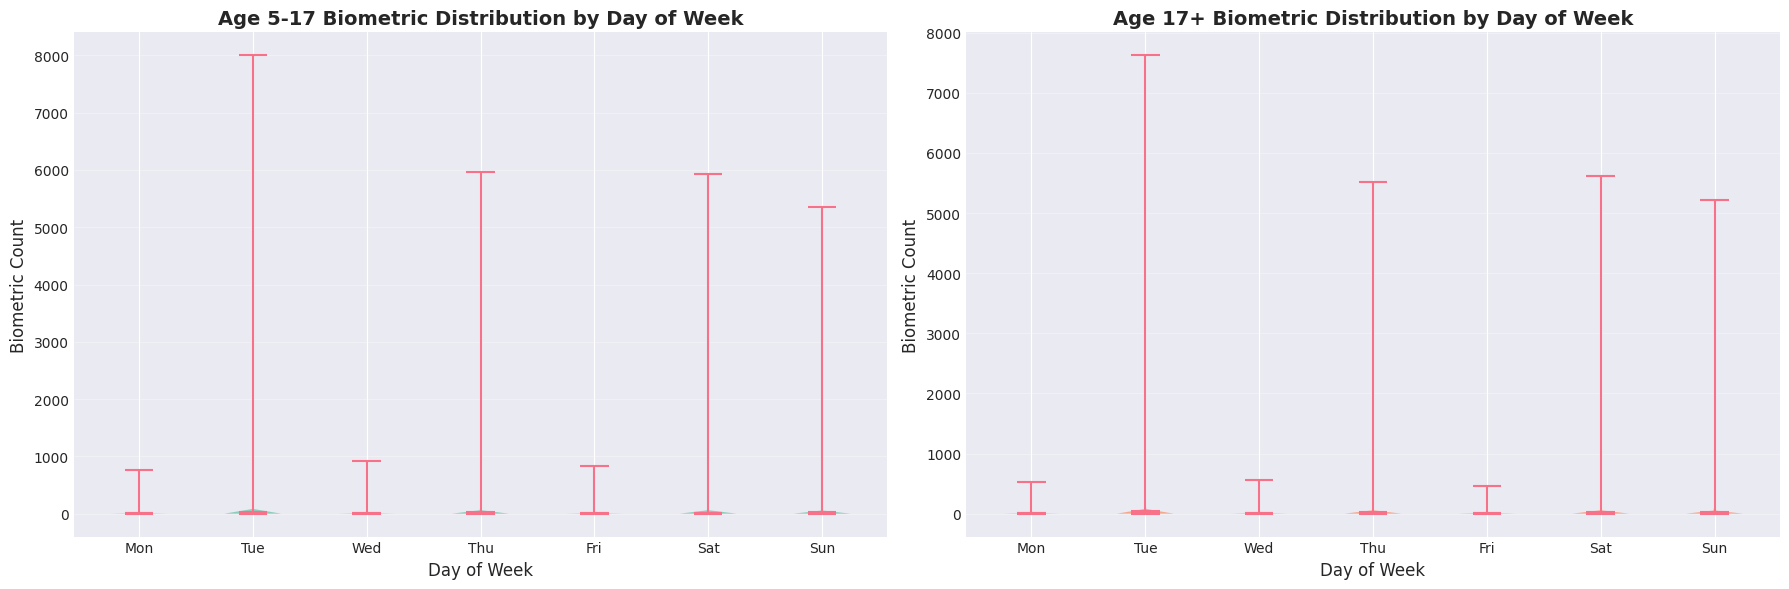

In [37]:
# Violin Plot - Compare Age Group Distributions by Day of Week
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Prepare data for violin plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
violin_data_5_17 = [df[df['day_name'] == day]['bio_age_5_17'].values for day in days_order]
violin_data_17_plus = [df[df['day_name'] == day]['bio_age_17_'].values for day in days_order]

# Age 5-17 Violin Plot
parts1 = ax1.violinplot(violin_data_5_17, positions=range(7), showmeans=True, showmedians=True)
for pc in parts1['bodies']:
    pc.set_facecolor('#66c2a5')
    pc.set_alpha(0.7)
ax1.set_xticks(range(7))
ax1.set_xticklabels([d[:3] for d in days_order])
ax1.set_title('Age 5-17 Biometric Distribution by Day of Week', fontsize=14, fontweight='bold')
ax1.set_ylabel('Biometric Count', fontsize=12)
ax1.set_xlabel('Day of Week', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Age 17+ Violin Plot
parts2 = ax2.violinplot(violin_data_17_plus, positions=range(7), showmeans=True, showmedians=True)
for pc in parts2['bodies']:
    pc.set_facecolor('#fc8d62')
    pc.set_alpha(0.7)
ax2.set_xticks(range(7))
ax2.set_xticklabels([d[:3] for d in days_order])
ax2.set_title('Age 17+ Biometric Distribution by Day of Week', fontsize=14, fontweight='bold')
ax2.set_ylabel('Biometric Count', fontsize=12)
ax2.set_xlabel('Day of Week', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

C:\Users\mkgaj\AppData\Local\Temp\ipykernel_25332\3814008935.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot([df_top_states[df_top_states['state'] == state]['bio_age_5_17'].values
C:\Users\mkgaj\AppData\Local\Temp\ipykernel_25332\3814008935.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([df_top_states[df_top_states['state'] == state]['bio_age_17_'].values


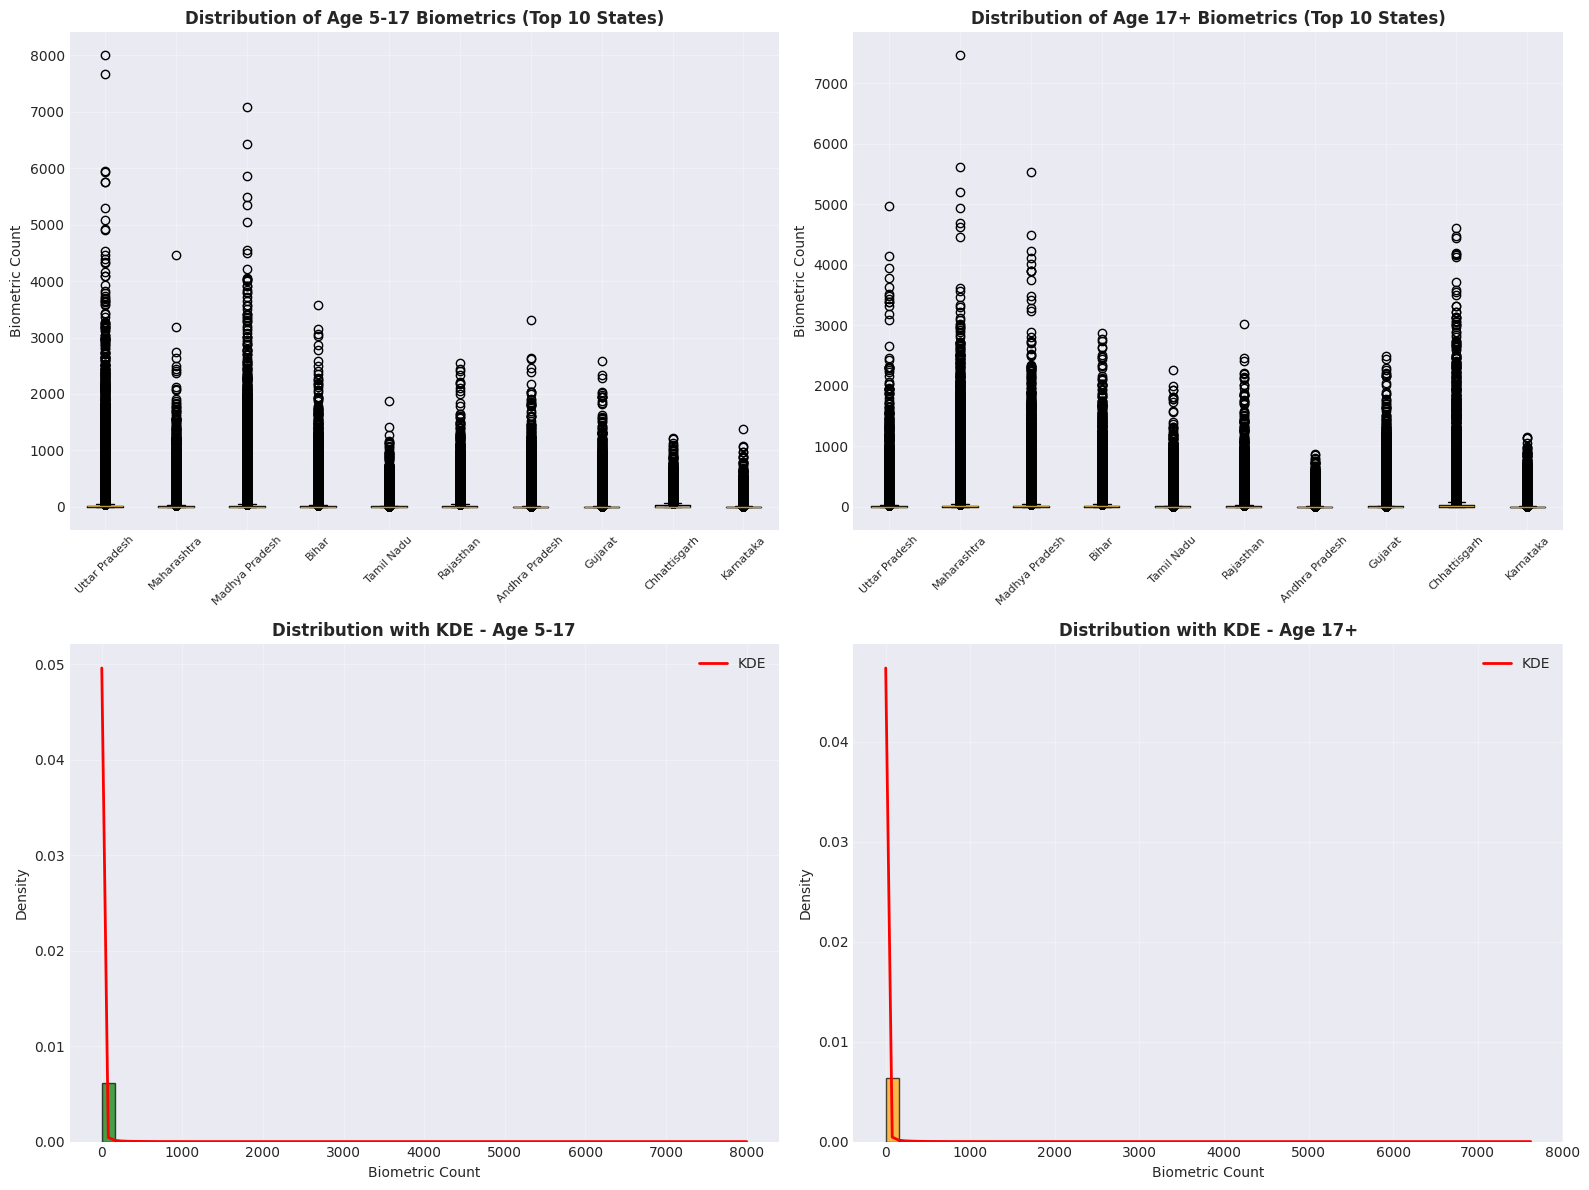

In [38]:
# Distribution Analysis - Box Plots and Violin Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot for age groups across top states
top_10_states_list = state_stats.head(10).index.tolist()
df_top_states = df[df['state'].isin(top_10_states_list)]

# Age 5-17 distribution
axes[0, 0].boxplot([df_top_states[df_top_states['state'] == state]['bio_age_5_17'].values 
                     for state in top_10_states_list], 
                    labels=[s[:15] for s in top_10_states_list])
axes[0, 0].set_title('Distribution of Age 5-17 Biometrics (Top 10 States)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Biometric Count', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0, 0].grid(True, alpha=0.3)

# Age 17+ distribution
axes[0, 1].boxplot([df_top_states[df_top_states['state'] == state]['bio_age_17_'].values 
                     for state in top_10_states_list], 
                    labels=[s[:15] for s in top_10_states_list])
axes[0, 1].set_title('Distribution of Age 17+ Biometrics (Top 10 States)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Biometric Count', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=8)
axes[0, 1].grid(True, alpha=0.3)

# Histogram with KDE - Age 5-17
axes[1, 0].hist(df['bio_age_5_17'], bins=50, density=True, alpha=0.7, color='green', edgecolor='black')
from scipy.stats import gaussian_kde
kde_5_17 = gaussian_kde(df['bio_age_5_17'].dropna())
x_range = np.linspace(df['bio_age_5_17'].min(), df['bio_age_5_17'].max(), 100)
axes[1, 0].plot(x_range, kde_5_17(x_range), 'r-', linewidth=2, label='KDE')
axes[1, 0].set_title('Distribution with KDE - Age 5-17', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Biometric Count', fontsize=10)
axes[1, 0].set_ylabel('Density', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Histogram with KDE - Age 17+
axes[1, 1].hist(df['bio_age_17_'], bins=50, density=True, alpha=0.7, color='orange', edgecolor='black')
kde_17_plus = gaussian_kde(df['bio_age_17_'].dropna())
x_range_17 = np.linspace(df['bio_age_17_'].min(), df['bio_age_17_'].max(), 100)
axes[1, 1].plot(x_range_17, kde_17_plus(x_range_17), 'r-', linewidth=2, label='KDE')
axes[1, 1].set_title('Distribution with KDE - Age 17+', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Biometric Count', fontsize=10)
axes[1, 1].set_ylabel('Density', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 Advanced Statistical Visualizations

In [39]:
print("="*80)
print("KEY INSIGHTS SUMMARY - BIOMETRIC DATA ANALYSIS")
print("="*80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Total Biometric Collections: {df['total_biometrics'].sum():,}")
print(f"   • Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   • Total Days: {df['date'].nunique()}")
print(f"   • States Covered: {df['state'].nunique()}")
print(f"   • Districts Covered: {df['district'].nunique()}")
print(f"   • PIN Codes Covered: {df['pincode'].nunique()}")

print(f"\n2. AGE GROUP DISTRIBUTION:")
total_5_17 = df['bio_age_5_17'].sum()
total_17_plus = df['bio_age_17_'].sum()
print(f"   • Age 5-17: {total_5_17:,} ({(total_5_17/(total_5_17+total_17_plus)*100):.1f}%)")
print(f"   • Age 17+: {total_17_plus:,} ({(total_17_plus/(total_5_17+total_17_plus)*100):.1f}%)")

print(f"\n3. TOP PERFORMING STATES:")
for idx, (state, row) in enumerate(state_stats.head(5).iterrows(), 1):
    print(f"   {idx}. {state}: {row['total_biometrics']:,} total biometrics")

print(f"\n4. TEMPORAL PATTERNS:")
print(f"   • Average daily biometrics: {daily_age_ts['total_biometrics'].mean():.0f}")
print(f"   • Peak day biometrics: {daily_age_ts['total_biometrics'].max():,}")
print(f"   • Minimum day biometrics: {daily_age_ts['total_biometrics'].min():,}")
weekend_total = df[df['is_weekend'] == 1]['total_biometrics'].sum()
weekday_total = df[df['is_weekend'] == 0]['total_biometrics'].sum()
print(f"   • Weekend collections: {weekend_total:,}")
print(f"   • Weekday collections: {weekday_total:,}")

print(f"\n5. GEOGRAPHIC COVERAGE:")
print(f"   • Districts per state (avg): {df.groupby('state')['district'].nunique().mean():.1f}")
print(f"   • PIN codes per district (avg): {df.groupby(['state', 'district'])['pincode'].nunique().mean():.1f}")

print(f"\n6. DATA QUALITY:")
print(f"   • Records with missing values: {df.isnull().any(axis=1).sum()}")
print(f"   • Anomalous days detected: {daily_age_ts['is_anomaly'].sum()}")

print("\n" + "="*80)
print("✅ Biometric Data Analysis Complete!")
print("="*80)

KEY INSIGHTS SUMMARY - BIOMETRIC DATA ANALYSIS

1. DATASET OVERVIEW:
   • Total Records: 1,861,108
   • Total Biometric Collections: 69,763,095
   • Date Range: 2025-03-01 to 2025-12-29
   • Total Days: 89
   • States Covered: 39
   • Districts Covered: 914
   • PIN Codes Covered: 19707

2. AGE GROUP DISTRIBUTION:
   • Age 5-17: 34,226,855 (49.1%)
   • Age 17+: 35,536,240 (50.9%)

3. TOP PERFORMING STATES:
   1. Uttar Pradesh: 9,577,735 total biometrics
   2. Maharashtra: 9,226,139 total biometrics
   3. Madhya Pradesh: 5,923,771 total biometrics
   4. Bihar: 4,897,587 total biometrics
   5. Tamil Nadu: 4,698,118 total biometrics

4. TEMPORAL PATTERNS:
   • Average daily biometrics: 783855
   • Peak day biometrics: 9,792,552
   • Minimum day biometrics: 39
   • Weekend collections: 22,688,072
   • Weekday collections: 47,075,023

5. GEOGRAPHIC COVERAGE:
   • Districts per state (avg): 24.2
   • PIN codes per district (avg): 31.4

6. DATA QUALITY:
   • Records with missing values: 0
   